# Advanced Data Analytics for Management Support
Atakan Senlen
Matrikelnummer:608265

# Introduction

Natural Language Processing is a discipline in Artificial Intelligence which creates interactions between machines and human languages. Natural Language Processing has its origins in late 40s-early 50s. In 1950, Alan Turing published a seminar paper called Computing Machine Learning and Intelligence. This work introduces a concept known as Turing Test which is a test for machine’s ability to act “indistinguishably” from the way human acts. [1]	. In 60s, significantly successful natural language processing systems are developed such as SHRDLU by Terry Winograd with “blocks world” [2] and ELIZA which is a simulation created by  Joseph Weizenbaum[3]. However, until 1980s, most of the NLP systems were based on sets of hand-written rules. Starting from late 80s and early 90s, Machine Learning algorithms were introduced to NLP. This was possible with increase in computational power (Moore’s law) and the “the gradual lessening of the dominance of Chomskyan theories of linguistics [4].

In the last decade, NLP improved quite rapidly by further improvements in computation power and data processing. Concepts like clouds helped to process enormous data. Deep Learning methods became more wide-spread in NLP Tasks. Today, NLP used very common at tasks such as Speech Recognition, Sentiment Analysis, Question Answering, Text Classification.

In this work, some articles from medium.com will be used in order to predict total number of claps received by each post. This task is close to Sentiment Analysis. However, Sentiment Analysis is a classification task to interpret emotions such as positive and negative, while our task is a regression task where the output is continuous.


# Packages and Data

This work is completed by local Jupiter Notebook on my personal computer due to similar performances with Google Colab platform. The packages and libraries used in this work are below, hence anyone should be able to replicate the results.


In [1]:
#!pip install tensorflow
#!pip install pandas
#!pip install numpy
#!pip install nltk
#!pip install re
#!pip install string
#!pip install sklearn 
#!pip install keras
#!pip install statsmodels
#!pip install statsmodels.api
#!pip install gensim
#!pip install scipy
#!pip install imblearn
#!pip install seaborn
#!pip install matplotlib.pyplot
#!pip install pickle
#pip install smogn==0.1.2
#pip install torch==1.6.0+cpu torchvision==0.7.0+cpu -f https://download.pytorch.org/whl/torch_stable.html
#!pip install tensorflow
#!pip install tensorflow-hub
#!pip install pytorch-pretrained-bert



import os
#reading data, writing data, arrays, dataframes and its derivatives
import pandas as pd
import numpy as np

# cleaning data
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import *
import re
import string

# preparing models
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# building Neural Network Models
import keras
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, LSTM,GRU, Dropout, Input, Bidirectional
from keras.layers.embeddings import Embedding
from keras.layers import Conv1D, GlobalMaxPool1D, concatenate
from keras.initializers import Constant
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ModelCheckpoint

# linear regression and ridge regression
import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer

# word2vec
import gensim
from gensim.models import Word2Vec

# scipy
from scipy.special import inv_boxcox, boxcox
from scipy.stats import pearsonr
from scipy.sparse import coo_matrix, hstack

from imblearn.over_sampling import SMOTE

import seaborn as sns
import seaborn as sns; sns.set() #visualization
%matplotlib inline
import matplotlib.pyplot as plt #visualization
%matplotlib inline
import pickle #for saving time
pd.set_option('display.max_columns', 50) #to display enough columns
pd.set_option('display.max_rows', 500) #to display enough rows
from tqdm import tqdm #for seeing processes
#for getting embedding matrix
from gensim.models import KeyedVectors
from gensim.models.keyedvectors import Word2VecKeyedVectors

import time
import matplotlib.pyplot as plt
%matplotlib inline

#smogn method
import smogn

#for constructing the benchmark
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import Lasso

#for creating the bert model
import random
import re
import string 
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.losses import CategoricalCrossentropy


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\gta\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#setting the directory
import os
os.chdir("C:\\Users\\gta\\Desktop\\adams\\ADAMS_NLPtask_SS20")

There are two main datasets from the medium.com: Train data set consist of training observations which has the output, test data consists of test observations. Train dataset is loaded as known and test dataset is loaded as unknown.

In [275]:
known = pd.read_csv("Train.csv")
unknown = pd.read_csv("Test.csv")

## Data Description

In [ ]:
#known['text'].head(20)
#known['totalClapCpount'].head(20)
#known.info()
#unknown.head()
#known.describe()
#unknown.describe()
#print(known.iloc[0:4,23])
#known['totalClapCount'].head()

At first glance at the data, it can be said that both of known and unknown data is very raw needs processing. While known data has 50 features, unknown data consists of only 6 columns(except for index). That means big chunk of the fatures in known data cannot be used. In known data, posts are shown multiple times since they are tagged differently each time, those will be remove to reduce the size of the data. Also at first glance, the output of known data looks like very imbalancly distributed such that most of the posts has around 0 claps. This issue will be discussed in later parts of this work. Most of variables in known data does not match with unknown data such as length and responses since they are in different scales. Those variables will be excluded. 

In [7]:

unknown1=unknown.copy()
#unknown1.head()
#unknown1['index'].head()
unknown1=unknown1.drop('index',1)
unknown1 = unknown1.drop(unknown1.columns[0], axis=1)
unknown1.head()
unknown=unknown1


In [8]:
unknown.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Author              514 non-null    object
 1   PublicationDetails  514 non-null    object
 2   Responses           432 non-null    object
 3   Header              506 non-null    object
 4   Text                514 non-null    object
 5   Length              514 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 24.2+ KB


In [29]:
known.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279577 entries, 0 to 279576
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   audioVersionDurationSec      279577 non-null  int64  
 1   codeBlock                    25179 non-null   object 
 2   codeBlockCount               279577 non-null  float64
 3   collectionId                 137878 non-null  object 
 4   createdDate                  279577 non-null  object 
 5   createdDatetime              279577 non-null  object 
 6   firstPublishedDate           279577 non-null  object 
 7   firstPublishedDatetime       279577 non-null  object 
 8   imageCount                   279577 non-null  int64  
 9   isSubscriptionLocked         279577 non-null  bool   
 10  language                     279577 non-null  object 
 11  latestPublishedDate          279577 non-null  object 
 12  latestPublishedDatetime      279577 non-null  object 
 13 

In [9]:
#known['responsesCreatedCount'].describe()
known['wordCount'].describe()
unknown['Length'].describe()

count      514.000000
mean      6545.963035
std       6449.069641
min        251.000000
25%        908.750000
50%       5228.000000
75%      10433.250000
max      32766.000000
Name: Length, dtype: float64

Length variable in uknown data counts the number of characters while known has only word counts. Therefore, those will be excluded from the data.

In [10]:
unknown1=unknown.copy()
#unknown1.head()
#unknown1['index'].head()
unknown1=unknown1.drop(['Length'],1)

unknown1.head()



,Author,PublicationDetails,Responses,Header,Text
0,Daniel Jeffries,"Daniel Jeffries in HackerNoon.comJul 31, 2017",627 responses,Why Everyone Missed the Most Mind-Blowing Feat...,There’s one incredible feature of cryptocurren...
1,Noam Levenson,"Noam Levenson in HackerNoon.comDec 6, 2017",156 responses,NEO versus Ethereum: Why NEO might be 2018’s s...,"<img class=""progressiveMedia-noscript js-progr..."
2,Daniel Jeffries,"Daniel Jeffries in HackerNoon.comJul 21, 2017",176 responses,The Cryptocurrency Trading Bible,So you want to trade cryptocurrency?You’ve see...
3,Haseeb Qureshi,"Haseeb Qureshi in HackerNoon.comFeb 19, 2018",72 responses,Stablecoins: designing a price-stable cryptocu...,A useful currency should be a medium of exchan...
4,William Belk,"William Belk in HackerNoon.comJan 28, 2018",19 responses,Chaos vs. Order — The Cryptocurrency Dilemma,Crypto crypto crypto crypto. It’s here. It’s h...


In [11]:
unknown=unknown1
unknown.head()

,Author,PublicationDetails,Responses,Header,Text
0,Daniel Jeffries,"Daniel Jeffries in HackerNoon.comJul 31, 2017",627 responses,Why Everyone Missed the Most Mind-Blowing Feat...,There’s one incredible feature of cryptocurren...
1,Noam Levenson,"Noam Levenson in HackerNoon.comDec 6, 2017",156 responses,NEO versus Ethereum: Why NEO might be 2018’s s...,"<img class=""progressiveMedia-noscript js-progr..."
2,Daniel Jeffries,"Daniel Jeffries in HackerNoon.comJul 21, 2017",176 responses,The Cryptocurrency Trading Bible,So you want to trade cryptocurrency?You’ve see...
3,Haseeb Qureshi,"Haseeb Qureshi in HackerNoon.comFeb 19, 2018",72 responses,Stablecoins: designing a price-stable cryptocu...,A useful currency should be a medium of exchan...
4,William Belk,"William Belk in HackerNoon.comJan 28, 2018",19 responses,Chaos vs. Order — The Cryptocurrency Dilemma,Crypto crypto crypto crypto. It’s here. It’s h...


There are posts in different languages in the data. However, the quite big chunk of the data has posts in english. Therefore, only the posts in english will be kept in known data for convenience. Also there is no language option in unknown data. That might cause some problems.

In [12]:

print(known['language'].value_counts().head(15))
print(known.shape)
print((known['language'].value_counts().head(1).values)/known.shape[0])


en         257655
es           3714
pt           3518
zh-Hant      2703
fr           2035
tr           1558
ru           1220
th           1217
ja           1035
it            851
id            750
ko            672
de            404
un            344
zh            338
Name: language, dtype: int64
(279577, 50)
[0.92158869]


92% of the words in english. Removing the posts in other languages wont harm the data.

In [276]:
known = known[known['language']=="en"]
print(known['language'].value_counts())

en    257655
Name: language, dtype: int64


Most of the posts are shown multiple times in known data since they are tagged differently. Those multiple rows will be removed from the data for having faster computations.

In [277]:
known = known.drop(['tag_name', 'slug', 'name', 'postCount'], axis=1)
known = known.drop_duplicates()
known.shape
#known.head()



(66380, 46)

In [135]:
known.shape

(66380, 46)

In [15]:
known['responsesCreatedCount'].describe()



count    66380.000000
mean         0.902757
std         14.940658
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3076.000000
Name: responsesCreatedCount, dtype: float64

Responses in known and unknown data are in quite a different scale. Therefore those variables will get removed.

In [283]:
unknown=unknown.drop(['Responses'],1)
unknown.head()

KeyError: "['Responses'] not found in axis"

Known data has so many unrelated features with unknown data. Therefore, those features will get removed in order to have faster matrix operations.

In [278]:
known1=known.copy()
known1.info()
#known1=pd.concat(known1.columns[39,6,22,21,23],axis=1)

known1=pd.concat([known1['author'],known1['firstPublishedDate'],known1['title'],known1['text'],known1['totalClapCount']],axis=1)
known1.head()
#known1.info()
#known1.iloc[1,:]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 66380 entries, 0 to 279572
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   audioVersionDurationSec      66380 non-null  int64  
 1   codeBlock                    5726 non-null   object 
 2   codeBlockCount               66380 non-null  float64
 3   collectionId                 31216 non-null  object 
 4   createdDate                  66380 non-null  object 
 5   createdDatetime              66380 non-null  object 
 6   firstPublishedDate           66380 non-null  object 
 7   firstPublishedDatetime       66380 non-null  object 
 8   imageCount                   66380 non-null  int64  
 9   isSubscriptionLocked         66380 non-null  bool   
 10  language                     66380 non-null  object 
 11  latestPublishedDate          66380 non-null  object 
 12  latestPublishedDatetime      66380 non-null  object 
 13  linksCount     

,author,firstPublishedDate,title,text,totalClapCount
0,Anar Babaev,2018-09-18,"Private Business, Government and Blockchain","Private Business, Government and Blockchain\n\...",100
3,George Sykes,2018-01-07,EPQ draft 1 (4844 words),EPQ draft 1 (4844 words)\nhttps://upload.wikim...,0
7,tech data,2018-03-08,"Ascent of data Science, SAS and Big data Analy...","Ascent of data Science, SAS and Big data Analy...",0
11,Stewart Alsop,2018-04-16,Can a robot love us better than another human ...,Can a robot love us better than another human ...,50
16,Melody Ucros,2017-10-22,"2017 Big Data, AI and IOT Use Cases","2017 Big Data, AI and IOT Use Cases\nAn Active...",27


In [279]:
known=known1
known.columns=['Author','Date','Header','Text','Clap']
known.head()

,Author,Date,Header,Text,Clap
0,Anar Babaev,2018-09-18,"Private Business, Government and Blockchain","Private Business, Government and Blockchain\n\...",100
3,George Sykes,2018-01-07,EPQ draft 1 (4844 words),EPQ draft 1 (4844 words)\nhttps://upload.wikim...,0
7,tech data,2018-03-08,"Ascent of data Science, SAS and Big data Analy...","Ascent of data Science, SAS and Big data Analy...",0
11,Stewart Alsop,2018-04-16,Can a robot love us better than another human ...,Can a robot love us better than another human ...,50
16,Melody Ucros,2017-10-22,"2017 Big Data, AI and IOT Use Cases","2017 Big Data, AI and IOT Use Cases\nAn Active...",27


Text in known data also contains the title in the beginning of text. The title part should be removed from the beginning of text otherwise those columns will be dependent.

In [280]:
#this is the function for removing the title from the text
def remove_prefix(text, prefix):
    if text.startswith(prefix):
        return text[len(prefix):]
    return text 
known1=known.copy()
known1['Text']=known1['Text'].astype(str)
known1['Text']=known1.apply(lambda row:remove_prefix(str(row['Text']),str(row['Header'])).strip(),axis=1)
known1.head()

known=known1
known.head()

,Author,Date,Header,Text,Clap
0,Anar Babaev,2018-09-18,"Private Business, Government and Blockchain",A major private IT company implements blockcha...,100
3,George Sykes,2018-01-07,EPQ draft 1 (4844 words),https://upload.wikimedia.org/wikipedia/commons...,0
7,tech data,2018-03-08,"Ascent of data Science, SAS and Big data Analy...",Various associations in the present days are o...,0
11,Stewart Alsop,2018-04-16,Can a robot love us better than another human ...,I discussed this with Michelle Tsng on my Podc...,50
16,Melody Ucros,2017-10-22,"2017 Big Data, AI and IOT Use Cases",An Active List of Interesting Use Cases Mentio...,27


Since both known data and unknown data has concept of publication dates, those can be used in the models. In order to use them in models, I will convert them as a number of the days passed until a certain date.

In [281]:
from datetime import datetime
date_format = "%Y-%m-%d"
today = datetime.strptime('2020-08-16', date_format)

known['elapsed']=known.apply(lambda  row: (today - datetime.strptime(row['Date'],date_format)).days,axis=1)
known.head()


,Author,Date,Header,Text,Clap,elapsed
0,Anar Babaev,2018-09-18,"Private Business, Government and Blockchain",A major private IT company implements blockcha...,100,698
3,George Sykes,2018-01-07,EPQ draft 1 (4844 words),https://upload.wikimedia.org/wikipedia/commons...,0,952
7,tech data,2018-03-08,"Ascent of data Science, SAS and Big data Analy...",Various associations in the present days are o...,0,892
11,Stewart Alsop,2018-04-16,Can a robot love us better than another human ...,I discussed this with Michelle Tsng on my Podc...,50,853
16,Melody Ucros,2017-10-22,"2017 Big Data, AI and IOT Use Cases",An Active List of Interesting Use Cases Mentio...,27,1029


In [282]:
date_format2='%b %d, %Y'
lala=datetime.strptime('Dec 6, 2017',date_format2)
print(lala)

2017-12-06 00:00:00


Unknown data also contains the date concept, however it is embedded in the end of the PublicationDetails feature. Those dates should be extreacted from that feature.

In [284]:
#this is the function to seperate the dates from Publication Details
def dateExtractor(datetext):
    try:
        lala=datetime.strptime(datetext[-12:],date_format2)
        return lala
    except:
        try:
            lala=datetime.strptime(datetext[-11:],date_format2)
            return lala
        except: 
            try:
                lala=datetime.strptime(datetext[-6:] +', 2019',date_format2)
                return lala
            except: 
                lala=datetime.strptime(datetext[-5:] +', 2019',date_format2)
                return lala
            
        
unknown['Elapsed']=unknown.apply(lambda x: (today - dateExtractor(x['PublicationDetails'])).days,axis=1)

unknown.head()
        


,Author,PublicationDetails,Header,Text,Elapsed
0,Daniel Jeffries,"Daniel Jeffries in HackerNoon.comJul 31, 2017",Why Everyone Missed the Most Mind-Blowing Feat...,There’s one incredible feature of cryptocurren...,1112
1,Noam Levenson,"Noam Levenson in HackerNoon.comDec 6, 2017",NEO versus Ethereum: Why NEO might be 2018’s s...,"<img class=""progressiveMedia-noscript js-progr...",984
2,Daniel Jeffries,"Daniel Jeffries in HackerNoon.comJul 21, 2017",The Cryptocurrency Trading Bible,So you want to trade cryptocurrency?You’ve see...,1122
3,Haseeb Qureshi,"Haseeb Qureshi in HackerNoon.comFeb 19, 2018",Stablecoins: designing a price-stable cryptocu...,A useful currency should be a medium of exchan...,909
4,William Belk,"William Belk in HackerNoon.comJan 28, 2018",Chaos vs. Order — The Cryptocurrency Dilemma,Crypto crypto crypto crypto. It’s here. It’s h...,931


In [285]:

known.rename(columns={'elapsed': 'Elapsed'},inplace=True)
known.head()

,Author,Date,Header,Text,Clap,Elapsed
0,Anar Babaev,2018-09-18,"Private Business, Government and Blockchain",A major private IT company implements blockcha...,100,698
3,George Sykes,2018-01-07,EPQ draft 1 (4844 words),https://upload.wikimedia.org/wikipedia/commons...,0,952
7,tech data,2018-03-08,"Ascent of data Science, SAS and Big data Analy...",Various associations in the present days are o...,0,892
11,Stewart Alsop,2018-04-16,Can a robot love us better than another human ...,I discussed this with Michelle Tsng on my Podc...,50,853
16,Melody Ucros,2017-10-22,"2017 Big Data, AI and IOT Use Cases",An Active List of Interesting Use Cases Mentio...,27,1029


In [286]:
unknown.head(10)

,Author,PublicationDetails,Header,Text,Elapsed
0,Daniel Jeffries,"Daniel Jeffries in HackerNoon.comJul 31, 2017",Why Everyone Missed the Most Mind-Blowing Feat...,There’s one incredible feature of cryptocurren...,1112
1,Noam Levenson,"Noam Levenson in HackerNoon.comDec 6, 2017",NEO versus Ethereum: Why NEO might be 2018’s s...,"<img class=""progressiveMedia-noscript js-progr...",984
2,Daniel Jeffries,"Daniel Jeffries in HackerNoon.comJul 21, 2017",The Cryptocurrency Trading Bible,So you want to trade cryptocurrency?You’ve see...,1122
3,Haseeb Qureshi,"Haseeb Qureshi in HackerNoon.comFeb 19, 2018",Stablecoins: designing a price-stable cryptocu...,A useful currency should be a medium of exchan...,909
4,William Belk,"William Belk in HackerNoon.comJan 28, 2018",Chaos vs. Order — The Cryptocurrency Dilemma,Crypto crypto crypto crypto. It’s here. It’s h...,931
5,Daniel Jeffries,"Daniel Jeffries in HackerNoon.comMay 30, 2018",Cryptocurrency Trading Bible Three: Winning in...,All trading is gambling.Some people refuse to ...,809
6,Coinbase,"Coinbase in The Coinbase BlogDec 19, 2018",Earn cryptocurrency while learning about new d...,Coinbase’s mission is to create an open financ...,606
7,David Gilbertson,"David Gilbertson in HackerNoon.comAug 6, 2018",Ripple: not a cryptocurrency,"If I recall correctly, I went the whole week w...",741
8,Daniel Jeffries,"Daniel Jeffries in HackerNoon.comJun 30, 2017",Eight Simple Rules for Protecting Your Cryptoc...,I ran a computer consulting company for a deca...,1143
9,Indrek Lasn,"Indrek Lasn in HackerNoon.comNov 25, 2017",Cryptocurrency Prices Straight Outta CLI 💰,Coinmon — Cryptocurrency price ticker CLI.Chec...,995


## Cleaning and Extracting Features

Both known and unknown data needs cleaning since the data is quite raw. Author, text and header are string features. Therefore, they need cleaning to exclude spelling mistakes, typos, urls, some special characters, punctuation etc.
Steps for text and header cleaning:

1.Removing URLs since it is very hard to represent them as words in models
2.Converting some short cuts for the words into their formal representations (such as  'll to will)
3.Removing punctuation: Since punctuations are not mostly pre-trained embeddings, they should be removed
4.Lower case: Since environment is character specific, all the text should be standardized.
5.Removing stop words: Stop words are the words that are used very frequently, but has no significant contribution or has no meaning by themselves (such as and, no, the). Removing them will reduce the size of the text and also lets rarer words to get captured.
6.Tokenization: Tokenization is segmentation of words and representing them as tokens. Tokenization will be done in later parts.[5]
Stemming or lemmatization will not be used since pre-trained Glove- weights will be used in models.

For author, all of the words will be gathered and treated as one word token.

I used https://www.kaggle.com/shahules/basic-eda-cleaning-and-glove  and  https://www.kaggle.com/christofhenkel/how-to-preprocessing-when-using-embeddings for cleaning the text

In [3]:
a="I am doing computers coding machine learning consultant x b "
#cleaning text
def clean_text(text):
    ##Removing the  URLs

    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r"\ re", " are ", text)
    text = re.sub(r" don t ", " do not ", text)
    text = re.sub(r"\ ve", " have ", text)
    text = re.sub(r"\ ll", " will ", text)
    text = re.sub(r"(W|w)on(\'|\’)t ", "will not ", text)
    text = re.sub(r"(C|c)an(\'|\’)t ", "can not ", text)
    text = re.sub(r"(Y|y)(\'|\’)all ", "you all ", text)
    text = re.sub(r"(Y|y)a(\'|\’)ll ", "you all ", text)

    ## Removing the punctuation from the text
    text = text.translate(string.punctuation) 

    ## Converting all the words to lower case and splitting them
    text = text.lower().split()
    ## Remove stop words

    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 2]
    
    text = " ".join(text)
    
## I took it from https://www.kaggle.com/adityaecdrid/public-version-text-cleaning-vocab-65 and modified according to my observations in the data
    text = re.sub(r"[^A-Za-z0-9]", " ", text)
    text = re.sub(r" vc ", "venture capital", text)
    text = re.sub(r" VC ", "venture capital", text)
    text = re.sub(r" lr ", "linear regression", text)
    text = re.sub(r" dl ", "deep learning", text)
    text = re.sub(r" it ", "information technology", text)
    text = re.sub(r" nlp ", "natural language processing", text) 
    text = re.sub(r'(\d+)([a-zA-Z])', '\g<1> \g<2>', text)
    text = re.sub(r'(\d+) (th|st|nd|rd) ', '\g<1>\g<2> ', text)
    text = re.sub(r'(\d+),(\d+)', '\g<1>\g<2>', text)
    text = re.sub(r'(\d+)(e)(\d+)','\g<1> \g<3>', text)
    text = re.sub(r" img ", " image ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r" e mail", "email", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = re.sub(r" usa ", " america ", text)
    text = re.sub(r" u s ", " america ", text)
    text = re.sub(r"the us", "america", text)
    text = re.sub(r" uk ", " england ", text)
    text = re.sub(r" dms ", "direct messages ", text)  
    text = re.sub(r"\0rs ", " rs ", text) 
    text = re.sub(r"ios", "apple operating system", text)
    text = re.sub(r"programing", "programming", text)
    text = re.sub(r'[\x00-\x1f\x7f-\x9f\xad]', '', text)
    text = re.sub(r'(\d+)(e)(\d+)',r'\g<1> \g<3>', text) #is a dup from above cell...
    text = re.sub(r"(-+|\.+)\s?", "  ", text)
    text = re.sub(r'ᴵ+', '', text) 
    text = re.sub(r" ai ", "artificial intelligence", text)
    text = re.sub(r" nn ", "neural networks", text)
    text = re.sub(r" rnn ", "recurrent neural networks", text)
    text = re.sub(r" ml ", "machine learning", text)
    text = re.sub(r"start up", "startup", text)
    text = re.sub(r"inteligencia artificial", "artificial intelligence", text)
    text = re.sub(r"intelligence artificielle", "artificial intelligence", text)    
    text = re.sub(r" vr ", "virtual reality", text)
    text = re.sub(r" tech ", " technology ", text)
    text = text.split()
    text = [w for w in text if len(w) >= 2]
    text = " ".join(text)
    
   
    
    return text


b=clean_text(a)
b


'computers coding machine learning consultant'

spelling errors checked

In [5]:
#authors cleaning
#clean authors
def clean_author(text):
    
    ## removing the punctiation
    text = text.translate(string.punctuation) 

    #cleaning the numbers and some characters
    text = re.sub(r"[^A-Za-z0-9]", "", text)

    ## converting all the letters in words to lowercase and then splitting 
    text = text.lower().split()
    
    #combining all words as one since authors should be unique like id
    text = "".join(text)
    
    return text

Feature extraction is processing the raw data as converting or recreate them into useful way such that they can be used as inputs in model. The features in known and unknown data can be used in models are:
1.Author:Author of each post can effect the clap count as some of the authors can be more popular than the others. However after
2.Text:This should be the most important feature since it the post should be the most relevant factor in the number of claps it gets. However, after some trials with the models, I found that using text is not helping and very time consuming and also does not work for BERT approach(I will come to this later)
3.Header:Title of a post can be also important on clap counts. Header will be the most frequent used feature in models in this work due to its convenience.
4.Elapsed: How many days passed since the post can be an important factor on predicting clap counts since new posts can need some time to get seen by the users.

In [151]:
#cleaning known text
known_cleaned=known.copy()

known_cleaned['Text']=known_cleaned['Text'].astype(str)
known_cleaned['Text']=known_cleaned.apply(lambda  x: clean_text(x['Text']) ,axis=1)
known_cleaned['Text'].head()

0     major private company implements blockchain ar...
3     introduction automation set un employ people s...
7     various associations present days opening entr...
11    discussed michelle tsng podcast crazy wisdom s...
16    active list interesting use cases mentioned cl...
Name: Text, dtype: object

In [153]:
#saving known_cleaned
with open('known_cleaned', 'wb') as f:
    pickle.dump(known_cleaned, f)

In [156]:
##cleaning the title in known
known_cleaned['Header']=known_cleaned['Header'].astype(str)
known_cleaned['Header']=known_cleaned.apply(lambda  x: clean_text(x['Header']) ,axis=1)
known_cleaned['Header'].head()

0                private business government blockchain
3                                  epq draft 4844 words
7     ascent data science sas big data analyst train...
11                   robot love us better another human
16    2017 big dataartificial intelligenceiot use cases
Name: Header, dtype: object

In [162]:
##cleaning the author in known
known_cleaned['Author']=known_cleaned['Author'].astype(str)
known_cleaned['Author']=known_cleaned.apply(lambda  x: clean_author(x['Author']),axis=1)
known_cleaned['Author'].head()

0       anarbabaev
3      georgesykes
7         techdata
11    stewartalsop
16     melodyucros
Name: Author, dtype: object

In [163]:
known_cleaned['Author'].head()

0       anarbabaev
3      georgesykes
7         techdata
11    stewartalsop
16     melodyucros
Name: Author, dtype: object

In [164]:
#saving known_cleaned
with open('known_cleaned', 'wb') as f:
    pickle.dump(known_cleaned, f)
    


In [165]:
with open('known', 'wb') as f:
    pickle.dump(known, f)

In [172]:
##cleaning the text in unknown
unknown_cleaned=unknown.copy()
unknown_cleaned['Text']=unknown_cleaned['Text'].astype(str)
unknown_cleaned['Text']=unknown_cleaned.apply(lambda  x: clean_text(x['Text']) ,axis=1)
unknown_cleaned['Text'].head()

0    there one incredible feature cryptocurrencies ...
1    image class progressivemedia noscript js progr...
2    want trade cryptocurrency you ve seen eye popp...
3    useful currency medium exchange unit account s...
4    crypto crypto crypto crypto information techno...
Name: Text, dtype: object

In [174]:
##cleaning the title in unknown
unknown_cleaned['Header']=unknown_cleaned['Header'].astype(str)
unknown_cleaned['Header']=unknown_cleaned.apply(lambda  x: clean_text(x['Header']) ,axis=1)
unknown_cleaned['Header'].head()

0    everyone missed mind blowing feature cryptocur...
1    neo rsus ethereum neo might 2018 strongest cry...
2                         cryptocurrency trading bible
3    stablecoins designing price stable cryptocurrency
4                chaos vs order cryptocurrency dilemma
Name: Header, dtype: object

In [176]:
##cleaning the author in unknown
unknown_cleaned['Author']=unknown_cleaned['Author'].astype(str)
unknown_cleaned['Author']=unknown_cleaned.apply(lambda  x: clean_author(x['Author']) ,axis=1)
unknown_cleaned['Author'].head()

0    danieljeffries
1      noamlevenson
2    danieljeffries
3     haseebqureshi
4       williambelk
Name: Author, dtype: object

In [178]:
#saving unknown_cleaned
with open('unknown_cleaned', 'wb') as f:
    pickle.dump(unknown_cleaned, f)
    

In [6]:
##
with open('unknown_cleaned', 'rb') as f:
    unknown_cleaned= pickle.load(f)

In [7]:
unknown_cleaned.head()

,Author,PublicationDetails,Header,Text,Elapsed
0,danieljeffries,"Daniel Jeffries in HackerNoon.comJul 31, 2017",everyone missed mind blowing feature cryptocur...,there one incredible feature cryptocurrencies ...,1112
1,noamlevenson,"Noam Levenson in HackerNoon.comDec 6, 2017",neo rsus ethereum neo might 2018 strongest cry...,image class progressivemedia noscript js progr...,984
2,danieljeffries,"Daniel Jeffries in HackerNoon.comJul 21, 2017",cryptocurrency trading bible,want trade cryptocurrency you ve seen eye popp...,1122
3,haseebqureshi,"Haseeb Qureshi in HackerNoon.comFeb 19, 2018",stablecoins designing price stable cryptocurrency,useful currency medium exchange unit account s...,909
4,williambelk,"William Belk in HackerNoon.comJan 28, 2018",chaos vs order cryptocurrency dilemma,crypto crypto crypto crypto information techno...,931


In [179]:
#saving unknown
with open('unknown', 'wb') as f:
    pickle.dump(unknown, f)

In [181]:
known_cleaned['Text'].str.split().map(lambda x: len(x)).describe()

count    66380.000000
mean       537.764176
std        499.519489
min          0.000000
25%        248.000000
50%        422.000000
75%        674.000000
max      14076.000000
Name: Text, dtype: float64

In [182]:
known_cleaned['Header'].str.split().map(lambda x: len(x)).describe()

count    66380.000000
mean         5.261916
std          2.246256
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         16.000000
Name: Header, dtype: float64

max length for text will be set to 1000 and max length for the header will be set to 10 since those values covers the big chunk of the distributions.

### GloVe Embeddings

Word embeddings are essential for language models since the number of unique words in vocabulary is quite big and trying one-hot encoding will end up having huge vectors. Also one-hot vectors are orthogonal to each other so it is impossible to keep relationships of the words with each other. There are various approaches for having emvedding matrices. Word2Vec is an example to that. It can be used to train own embeddings. However, the computation power of personal computers is quite restricted. Therefore, pre-trained word embeddings are widely used recently. Google's Word2Vec and Standford's GloVe is the most common examples of pre-trained embeddings. GloVe embeddings on Wikipedia and Gigaword5 with 100d will be used in this work. GloVe by Standford University is a log-bilinear regression approach which combines the advantages of two major models in literature: “global matrix factorization and local context window methods.” Unlike Word2Vec, GloVe takes statistical information into account efficiently leverages it.[6] 

In [13]:
#extracting the GloVe weights from the text file
embedding_dict={}
with open('glove.6B.100d.txt','r',encoding="utf8") as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

In [14]:
embedding_dict

{'the': array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
        -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
         0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
        -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
         0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
        -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
         0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
         0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
        -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
        -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
        -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
        -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
        -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
        -1.2526  ,  0.071624,  

In [196]:
# test train split
train ,test = train_test_split(known_cleaned, test_size=0.25, random_state=35)


print(train.shape)
print(test.shape)

(49785, 6)
(16595, 6)


In [198]:
print(train.shape)

(49785, 6)


I realized that there are some words which are written together while they should have been written seperately. I will sepereate the most common two.

In [101]:
def clean2_text(text):
    ##seems like there are so many merged words ends with artifical and starts with intelligence i want to remove them
    text=re.sub('(.*?)\s*artificial','\g<1> artificial',text)
    text=re.sub('intelligence(.*?)\s*','intelligence \g<1>',text)
   
    
    return text

In [244]:
train['Text']=train['Text'].astype(str)
train['Text']=train.apply(lambda  x: clean2_text(x['Text']) ,axis=1)
train['Text'].head()

test['Text']=test['Text'].astype(str)
test['Text']=test.apply(lambda  x: clean2_text(x['Text']) ,axis=1)
test['Text'].head()



C:\Users\gta\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\gta\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\gta\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

79048     home canada past christmas father approached g...
46189     data analyst trade get next level career start...
2917      advent social media voicing documented opinion...
163914    days go datahack summit analyticsvidhya com in...
60287     data warehouses instrumental breaking data sil...
Name: Text, dtype: object

In [246]:
train['Header']=train['Header'].astype(str)
train['Header']=train.apply(lambda  x: clean2_text(x['Header']) ,axis=1)
train['Header'].head()

test['Header']=test['Header'].astype(str)
test['Header']=test.apply(lambda  x: clean2_text(x['Header']) ,axis=1)
test['Header'].head()

C:\Users\gta\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\gta\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\gta\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

79048               artificial intelligence good bad useful
46189     self learning data science housing price predi...
2917                                 likes shares sentiment
163914                                  10 new things ad ai
60287          top misconceptions data warehousing projects
Name: Header, dtype: object

In [247]:
#saving glove_weights
with open('train', 'wb') as f:
    pickle.dump(train, f)
   
with open('test', 'wb') as f:
    pickle.dump(test, f)

In [15]:
#with open('train', 'rb') as f:
    #train=pickle.load(f)
#with open('test','rb') as f:
    #test=pickle.load(f)

In [17]:
train.head()

,Author,Date,Header,Text,Clap,Elapsed
28058,linkventures,2017-11-03,dave blundin big data visionary,link ventures data driven accelerator cogo lab...,47,1017
219818,zaiku,2018-06-03,nanosai studio open beta lease 2018 06 01,data intelligence startups devops we pleased a...,0,805
230787,corsairspublishing,2017-12-24,gamer guide analytics v1,gamer guide analytics v1 series manifesto hist...,922,966
20018,nyucenterfordatascience,2017-11-02,tracking hackersnatural language processingmac...,automated approach analyzing activity undergro...,105,1018
85184,yvanscher,2018-02-20,pytorch tip yielding image sizes,need get image sizes using torchvision dataset...,8,908


### Padding

We need to convert strings of words to arrays of the tokens. However the number of the words in each text or header observations is different. We need to convert those tokens into same length of numpy arrays. When I observe the distribution of the word counts in header and text I decided to set max length for text as 200 words(I decided to reduce it from 1000 for having faster computation) and max length for Header as 10 words since those numbers covers the quite a big chunk of the distribution. The observations with shorter lengths will have token of 0s at the end. This is called padding the 0s.

In [69]:
# train test title padding
MAX_LEN=200
vocabsize=50000
tokenizer_obj=Tokenizer(num_words=vocabsize,oov_token=1)
tokenizer_obj.fit_on_texts(train['Text'])
sequences=tokenizer_obj.texts_to_sequences(train['Text'])
train_text_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

sequences_test=tokenizer_obj.texts_to_sequences(test['Text'])
test_text_pad=pad_sequences(sequences_test,maxlen=MAX_LEN,truncating='post',padding='post')
print(train_text_pad)
print(test_text_pad)

In [35]:
## padding for train test title
MAX_LEN2=10
sequences_title=tokenizer_obj.texts_to_sequences(train['Header'])
train_title_pad=pad_sequences(sequences_title,maxlen=MAX_LEN2,truncating='post',padding='post')

sequences_title_test=tokenizer_obj.texts_to_sequences(test['Header'])
test_title_pad=pad_sequences(sequences_title_test,maxlen=MAX_LEN2,truncating='post',padding='post')

print(train_title_pad)
print(test_title_pad)



[[ 6258     1   113 ...     0     0     0]
 [38025  2515   201 ...  2868     0     0]
 [13841   862   197 ...     0     0     0]
 ...
 [  527   486  6484 ...    11     0     0]
 [ 3630 29485  7154 ...     0     0     0]
 [ 2176  3809   460 ...     0     0     0]]
[[   4    3   70 ...    0    0    0]
 [ 261    5    2 ...  117 1499    0]
 [2438 3369  983 ...    0    0    0]
 ...
 [ 615 8127 6462 ...    0    0    0]
 [   1 1955 2255 ...    0    0    0]
 [ 217 1535  772 ...    0    0    0]]


In [20]:
##padding for  train test  author
tokenizer_obj_author=Tokenizer()
tokenizer_obj_author.fit_on_texts(train['Author'])
sequences_author=tokenizer_obj_author.texts_to_sequences(train['Author'])
train_author_pad=pad_sequences(sequences_author,1,truncating='post',padding='post')

sequences_author_test=tokenizer_obj_author.texts_to_sequences(test['Author'])
test_author_pad=pad_sequences(sequences_author_test,1,truncating='post',padding='post')

print(train_author_pad)
print(test_author_pad)



[[7602]
 [4059]
 [  10]
 ...
 [1914]
 [2058]
 [6495]]
[[   0]
 [   0]
 [5066]
 ...
 [3489]
 [   0]
 [1216]]


This function will be used for constructing an embedding matrix for tokens using GloVe weights.

In [21]:
def get_embedding_matrix(tokenizer, pretrain, vocab_size):
    '''
        Helper function to construct an embedding matrix for 
        the focal corpus based on some pre-trained embeddings.
    '''
    
    dim = 0
    if isinstance(pretrain, KeyedVectors) or isinstance(pretrain, Word2VecKeyedVectors):
        dim = pretrain.vector_size        
    elif isinstance(pretrain, dict):
        dim = next(iter(pretrain.values())).shape[0]  # get embedding of an arbitrary word
    else:
        raise Exception('{} is not supported'.format(type(pretrain)))
    
    
    # Initialize embedding matrix
    emb_mat = np.zeros((vocab_size, dim))

    # There will be some words in our corpus for which we lack a pre-trained embedding.
    # In this tutorial, we will simply use a vector of zeros for such words. We also keep
    # track of the words to do some debugging if needed
    oov_words = []
    # Below we use the tokenizer object that created our task vocabulary. This is crucial to ensure
    # that the position of a words in our embedding matrix corresponds to its index in our integer
    # encoded input data
    for word, i in tokenizer.word_index.items():  
        # try-catch together with a zero-initilaized embedding matrix achieves our rough fix for oov words
        try:
            emb_mat[i] = pretrain[word]
        except:
            oov_words.append(word)
    print('Created embedding matrix of shape {}'.format(emb_mat.shape))
    print('Encountered {} out-of-vocabulary words.'.format(len(oov_words)))
    return (emb_mat, oov_words)

In [3]:
#from gensim.models import KeyedVectors
#from gensim.models.keyedvectors import Word2VecKeyedVectors
glove_weights, _ = get_embedding_matrix(tokenizer_obj, embedding_dict, vocabsize)


In [25]:
#saving glove_weights
with open('glove_weights', 'wb') as f:
    pickle.dump(glove_weights, f)
    #with open('filename', 'rb') as f:
    #var_you_want_to_load_into = pickle.load(f)


# Models

Neural network is a computational learning system that uses a network of functions to understand and translate a data input of one form into a desired output, usually in another form. The concept of the artificial neural network was inspired by human biology and the way neurons of the human brain function together to understand inputs from human senses. 

Neural networks are just one of many tools and approaches used in machine learning algorithms. The neural network itself may be used as a piece in many different machine learning algorithms to process complex data inputs into a space that computers can understand. [7]

Recurrent Neural Network is used in this work: Recurrent neural networks, also known as RNNs, are a class of neural networks that allow previous outputs to be used as inputs while having hidden states. [8]. 

Transformer is an architecture which based on attention mechanism which decides what part of a sequence is important in each step.[9]

BERT is used in this work: BERT is a new language model which is designed for pretraining deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context in all layers.[10]


Hyperparameters

Epoch: Epoch is a one complete iteration which all parameters and entire dataset is passed through the neural network. Since all the parameters only can get updated once in each epoch, one epoch is not enough for neural networks. Several epochs are needed to learn the patterns in the data.

Batch size: Dataset is given to models batch by batch, hence batch size defines how many points on the dataset will be given in a single batch. Increasing batch number of batches. However, too big batch sizes can lead to overfitting behavior, therefore it should be carefully selected.

Dropout: Dropout is randomly dropping units by killing some neurons in the layers. This prevents adapting too much into one direction. Dropouts are usually giving improvements on overfitting problems.

Activation function: Activation functions are the functions take the linear combinations from the last layer as input and transforms them in a non-linear way. Without activation functions, outputs can be represented as linear combinations of inputs which is very similar to regression. Activation functions are essential for neural networks to learn non-linear patterns. Three types of activation functions are used in this work:
Relu:Relu is an activation function which takes positive part of the linear combination of the outputs from the last layer. If it is less than 0 relu maps it to 0. It gives a fast computation due to linear behavior and discussed as being more robust since it can cover more of the feature space.
Tanh:Hyperbolic tangent function which has the greatest derivative in the middle and gets smoothened towards the edges. Its range lies between -1 and 1.
Linear: Line function. It is very easy for computation, however in gradient descent algorithms it can lead to being stuck in some unwanted regions due to constant behavior of its derivative.
Optimizer: Only ADAM optimizer is used in this work. Therefore, it can be counted as constant parameter.



## RNN MODEL

LSTM is a special type of RNN which is designed to overcome long-time dependency problem. It can learn to bridge time intervals in excess of 1000 steps even in case of noisy, incompressible input sequences, without loss of short time lag capabilities.[11]
LSTM models with text and header are used in this work. However, I found out that using text in LSTM doesn't help the quality of the prediction and it is very time consuming.

Since I decided not to use text, I need to tokenize header individually.

In [105]:

## padding for train test title
vocabsize2=20000
tokenizer_obj_title=Tokenizer(num_words=vocabsize2,oov_token=1)
tokenizer_obj_title.fit_on_texts(train['Header'])
MAX_LEN2=10
sequences_title2=tokenizer_obj_title.texts_to_sequences(train['Header'])
train_title_pad2=pad_sequences(sequences_title2,maxlen=MAX_LEN2,truncating='post',padding='post')

sequences_title_test2=tokenizer_obj_title.texts_to_sequences(test['Header'])
test_title_pad2=pad_sequences(sequences_title_test2,maxlen=MAX_LEN2,truncating='post',padding='post')

In [ ]:
glove_weights2, dd = get_embedding_matrix(tokenizer_obj_title, embedding_dict, vocabsize2)

In [ ]:
with open('glove_weights2','wb') as file_name:
    pickle.dump(glove_weights2, file_name)

In [109]:
embedding_layer_title = Embedding(vocabsize2, 
                         100,  
                         embeddings_initializer=Constant(glove_weights2), 
                         input_length=MAX_LEN2, 
                         trainable=False  # we start with frozen weights and relax this choice in model #5
                         )
#model_title1 = Sequential()
#model_title1.add(embedding_layer_title)
#model_title1.add(LSTM(100, dropout=0.5, recurrent_dropout=0.2))
#model_title1.add(Dense(1, activation='relu'))
#model_title1.compile(loss='mse', optimizer='adam', metrics=['mse'])
#model_title1.summary()

### Dealing with Imbalanced Learning 

Usually real life data sets are having imbalanced categories. Some factors of the categorical variables can be represented very rarely in the dataset. These can lead to bias towards the dominant factors of those categories. Even though our problem is a regression task, the output variable is imbalanced due to having the most observations very close to 0. That is a problem should be handled. There are usually two types of remedies to this problem: Adapting the loss function accordingly or adapting the training data set. In this work training data set is adjusted.

There are 3 common ways of rebalancing the training set:
1.Undersampling: It is basic and common way to deal with imbalanced data. Undersampling is simply excluding some of the training data in majority class. In our case, the posts with claps less than 500 can be considered as majority. However, there is a down side of undersampling: It will cause to lose some information due to excluding the observations. There might be important patterns to learn from the data.

2.SMOTE; It is an approach to the construction of classifiers from imbalanced datasets [12]. Instead of replication of the minority classes present in the data, SMOTE synthetically produces the data for minority class by using local neighborhood. Averages of covariates and the output within neighborhood range are used to create synthetic observations. However, SMOTE is suitable to classification tasks. There is a version called SmoteR for regression tasks.

3.SMOGN: This method combines two oversampling methods SMOTER and Gaussian Noise in creating synthetic data. SMOGN will generate new synthetic examples with SmoteR only when the seed example and the k-nearest neighbour selected are “close enough” and will use the introduction of Gaussian Noise when the two examples are “more distant”[13]. In this work, SMOGN algortihm will be used since it is more suitable to regression tasks and more robust due to combination of two methods.


In [149]:
known_cleaned['Clap'].describe()

count     66380.000000
mean        173.135026
std        1891.890063
min           0.000000
25%           0.000000
50%           6.000000
75%          65.000000
max      291706.000000
Name: Clap, dtype: float64

The Clap count is quite imbalanced.

In [5]:
import smogn
import seaborn

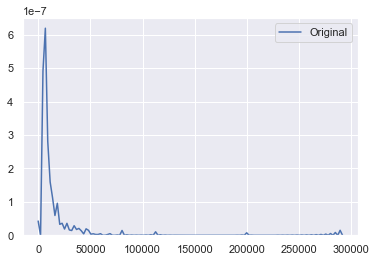

In [155]:
seaborn.kdeplot(known_cleaned['Clap'], label = "Original")

In [156]:
print(known_cleaned[known_cleaned['Clap'] == 0].count()['Clap'])

20858


In [187]:
#since title will be used in models, smogn will be applied to title. Padding of header and elapsed is combined to create a dataframe for SMOGN
my_title = pd.DataFrame(data=train_title_pad2, columns=['one','two','three','four','five','six','seven','eight','nine','ten'])
my_author = pd.DataFrame(data=train_author_pad, columns=['author'])
my_title.reset_index(drop=True, inplace=True)
my_author.reset_index(drop=True, inplace=True)

In [190]:
train_for_smogn=train.copy()
train_for_smogn.reset_index(drop=True, inplace=True)
train_for_smogn=pd.concat([train_for_smogn['Clap'],my_title, my_author,train_for_smogn['Elapsed']],axis=1)
train_for_smogn.head()                           

,Clap,one,two,three,four,five,six,seven,eight,nine,ten,author,Elapsed
0,47,4548,11934,24,4,3811,0,0,0,0,0,7602,1017
1,0,11935,665,98,1317,654,9,2118,1232,0,0,4059,805
2,922,4549,55,25,2862,0,0,0,0,0,0,10,966
3,105,808,11936,38,4143,5,0,0,0,0,0,16,1018
4,8,435,2863,11937,66,3496,0,0,0,0,0,385,908


https://github.com/nickkunz/smogn This github respiratory helped me to construct the SMOGN approach on the data.

In [194]:
## conduct smogn
train_smogned1 = smogn.smoter(
    
    ## main arguments
    data = train_for_smogn,           ## pandas dataframe
    y = 'Clap',          ## string ('header name')
    k = 7,                    ## positive integer (k < n)
    samp_method = 'extreme',  ## string ('balance' or 'extreme')

    ## phi relevance arguments
    rel_thres = 0.40,         ## positive real number (0 < R < 1)
    rel_method = 'auto',      ## string ('auto' or 'manual')
    rel_xtrm_type = 'high',   ## string ('low' or 'both' or 'high')
    rel_coef = 1.50           ## positive real number (0 < R)
)




dist_matrix:   0%|          | 0/11654 [00:00<?, ?it/s]


dist_matrix:   0%|          | 1/11654 [00:05<19:00:18,  5.87s/it]


dist_matrix:   0%|          | 2/11654 [00:11<18:41:54,  5.78s/it]


dist_matrix:   0%|          | 3/11654 [00:17<18:35:40,  5.75s/it]


dist_matrix:   0%|          | 4/11654 [00:22<18:24:40,  5.69s/it]


dist_matrix:   0%|          | 5/11654 [00:28<18:16:21,  5.65s/it]


dist_matrix:   0%|          | 6/11654 [00:33<18:21:43,  5.68s/it]


dist_matrix:   0%|          | 7/11654 [00:39<18:31:11,  5.72s/it]


dist_matrix:   0%|          | 8/11654 [00:45<18:16:01,  5.65s/it]


dist_matrix:   0%|          | 9/11654 [00:50<18:09:15,  5.61s/it]


dist_matrix:   0%|          | 10/11654 [00:56<18:11:49,  5.63s/it]


dist_matrix:   0%|          | 11/11654 [01:01<18:05:44,  5.60s/it]


dist_matrix:   0%|          | 12/11654 [01:07<17:59:08,  5.56s/it]


dist_matrix:   0%|          | 13/11654 [01:13<18:09:28,  5.62s/it]


dist_matrix:   0%|          | 14/11654 [01:18<18:01:

dist_matrix:   2%|1         | 208/11654 [19:25<17:47:47,  5.60s/it]


dist_matrix:   2%|1         | 209/11654 [19:30<17:39:14,  5.55s/it]


dist_matrix:   2%|1         | 210/11654 [19:36<17:41:12,  5.56s/it]


dist_matrix:   2%|1         | 211/11654 [19:41<17:42:23,  5.57s/it]


dist_matrix:   2%|1         | 212/11654 [19:47<17:37:38,  5.55s/it]


dist_matrix:   2%|1         | 213/11654 [19:52<17:39:29,  5.56s/it]


dist_matrix:   2%|1         | 214/11654 [19:58<17:35:58,  5.54s/it]


dist_matrix:   2%|1         | 215/11654 [20:03<17:34:23,  5.53s/it]


dist_matrix:   2%|1         | 216/11654 [20:09<17:38:50,  5.55s/it]


dist_matrix:   2%|1         | 217/11654 [20:14<17:37:25,  5.55s/it]


dist_matrix:   2%|1         | 218/11654 [20:20<17:31:20,  5.52s/it]


dist_matrix:   2%|1         | 219/11654 [20:25<17:34:37,  5.53s/it]


dist_matrix:   2%|1         | 220/11654 [20:31<17:41:24,  5.57s/it]


dist_matrix:   2%|1         | 221/11654 [20:37<17:51:52,  5.63s/it]


dist_matrix:   2%|1 

dist_matrix:   4%|3         | 414/11654 [39:39<19:01:14,  6.09s/it]


dist_matrix:   4%|3         | 415/11654 [39:45<18:41:40,  5.99s/it]


dist_matrix:   4%|3         | 416/11654 [39:51<19:02:14,  6.10s/it]


dist_matrix:   4%|3         | 417/11654 [39:57<18:47:18,  6.02s/it]


dist_matrix:   4%|3         | 418/11654 [40:03<18:37:26,  5.97s/it]


dist_matrix:   4%|3         | 419/11654 [40:10<19:06:24,  6.12s/it]


dist_matrix:   4%|3         | 420/11654 [40:16<18:57:52,  6.08s/it]


dist_matrix:   4%|3         | 421/11654 [40:22<19:01:05,  6.10s/it]


dist_matrix:   4%|3         | 422/11654 [40:28<18:51:13,  6.04s/it]


dist_matrix:   4%|3         | 423/11654 [40:34<18:49:36,  6.03s/it]


dist_matrix:   4%|3         | 424/11654 [40:40<19:08:20,  6.14s/it]


dist_matrix:   4%|3         | 425/11654 [40:46<18:57:39,  6.08s/it]


dist_matrix:   4%|3         | 426/11654 [40:52<18:41:02,  5.99s/it]


dist_matrix:   4%|3         | 427/11654 [40:58<19:08:23,  6.14s/it]


dist_matrix:   4%|3 

dist_matrix:   5%|5         | 620/11654 [1:00:11<18:40:32,  6.09s/it]


dist_matrix:   5%|5         | 621/11654 [1:00:17<18:54:39,  6.17s/it]


dist_matrix:   5%|5         | 622/11654 [1:00:24<19:09:47,  6.25s/it]


dist_matrix:   5%|5         | 623/11654 [1:00:30<18:58:37,  6.19s/it]


dist_matrix:   5%|5         | 624/11654 [1:00:35<18:37:34,  6.08s/it]


dist_matrix:   5%|5         | 625/11654 [1:00:42<18:36:10,  6.07s/it]


dist_matrix:   5%|5         | 626/11654 [1:00:48<18:49:21,  6.14s/it]


dist_matrix:   5%|5         | 627/11654 [1:00:54<18:42:00,  6.11s/it]


dist_matrix:   5%|5         | 628/11654 [1:01:00<18:47:49,  6.14s/it]


dist_matrix:   5%|5         | 629/11654 [1:01:06<18:43:17,  6.11s/it]


dist_matrix:   5%|5         | 630/11654 [1:01:13<19:00:28,  6.21s/it]


dist_matrix:   5%|5         | 631/11654 [1:01:19<18:49:39,  6.15s/it]


dist_matrix:   5%|5         | 632/11654 [1:01:25<18:52:17,  6.16s/it]


dist_matrix:   5%|5         | 633/11654 [1:01:31<18:42:10,  6.11

dist_matrix:   7%|7         | 822/11654 [1:19:17<16:55:47,  5.63s/it]


dist_matrix:   7%|7         | 823/11654 [1:19:22<17:04:37,  5.68s/it]


dist_matrix:   7%|7         | 824/11654 [1:19:28<16:54:47,  5.62s/it]


dist_matrix:   7%|7         | 825/11654 [1:19:34<17:03:49,  5.67s/it]


dist_matrix:   7%|7         | 826/11654 [1:19:39<16:56:42,  5.63s/it]


dist_matrix:   7%|7         | 827/11654 [1:19:45<16:50:02,  5.60s/it]


dist_matrix:   7%|7         | 828/11654 [1:19:51<17:05:22,  5.68s/it]


dist_matrix:   7%|7         | 829/11654 [1:19:56<16:55:01,  5.63s/it]


dist_matrix:   7%|7         | 830/11654 [1:20:02<16:49:31,  5.60s/it]


dist_matrix:   7%|7         | 831/11654 [1:20:07<17:00:16,  5.66s/it]


dist_matrix:   7%|7         | 832/11654 [1:20:13<16:58:04,  5.64s/it]


dist_matrix:   7%|7         | 833/11654 [1:20:19<16:51:54,  5.61s/it]


dist_matrix:   7%|7         | 834/11654 [1:20:24<17:03:12,  5.67s/it]


dist_matrix:   7%|7         | 835/11654 [1:20:30<16:58:34,  5.65

dist_matrix:   9%|8         | 1023/11654 [1:38:01<16:17:11,  5.52s/it]


dist_matrix:   9%|8         | 1024/11654 [1:38:07<16:18:51,  5.53s/it]


dist_matrix:   9%|8         | 1025/11654 [1:38:12<16:18:04,  5.52s/it]


dist_matrix:   9%|8         | 1026/11654 [1:38:18<16:18:09,  5.52s/it]


dist_matrix:   9%|8         | 1027/11654 [1:38:23<16:20:46,  5.54s/it]


dist_matrix:   9%|8         | 1028/11654 [1:38:29<16:20:01,  5.53s/it]


dist_matrix:   9%|8         | 1029/11654 [1:38:34<16:19:44,  5.53s/it]


dist_matrix:   9%|8         | 1030/11654 [1:38:40<16:14:16,  5.50s/it]


dist_matrix:   9%|8         | 1031/11654 [1:38:45<16:17:31,  5.52s/it]


dist_matrix:   9%|8         | 1032/11654 [1:38:51<16:14:02,  5.50s/it]


dist_matrix:   9%|8         | 1033/11654 [1:38:56<16:12:51,  5.50s/it]


dist_matrix:   9%|8         | 1034/11654 [1:39:02<16:19:24,  5.53s/it]


dist_matrix:   9%|8         | 1035/11654 [1:39:07<16:16:58,  5.52s/it]


dist_matrix:   9%|8         | 1036/11654 [1:39:13<1

dist_matrix:  10%|#         | 1221/11654 [1:57:17<16:56:34,  5.85s/it]


dist_matrix:  10%|#         | 1222/11654 [1:57:23<16:42:07,  5.76s/it]


dist_matrix:  10%|#         | 1223/11654 [1:57:28<16:38:00,  5.74s/it]


dist_matrix:  11%|#         | 1224/11654 [1:57:34<16:24:51,  5.67s/it]


dist_matrix:  11%|#         | 1225/11654 [1:57:39<16:14:51,  5.61s/it]


dist_matrix:  11%|#         | 1226/11654 [1:57:45<16:28:46,  5.69s/it]


dist_matrix:  11%|#         | 1227/11654 [1:57:51<16:31:40,  5.71s/it]


dist_matrix:  11%|#         | 1228/11654 [1:57:57<16:34:14,  5.72s/it]


dist_matrix:  11%|#         | 1229/11654 [1:58:02<16:24:25,  5.67s/it]


dist_matrix:  11%|#         | 1230/11654 [1:58:08<16:21:19,  5.65s/it]


dist_matrix:  11%|#         | 1231/11654 [1:58:14<16:23:19,  5.66s/it]


dist_matrix:  11%|#         | 1232/11654 [1:58:19<16:24:11,  5.67s/it]


dist_matrix:  11%|#         | 1233/11654 [1:58:25<16:49:39,  5.81s/it]


dist_matrix:  11%|#         | 1234/11654 [1:58:32<1

dist_matrix:  12%|#2        | 1419/11654 [2:16:35<15:53:49,  5.59s/it]


dist_matrix:  12%|#2        | 1420/11654 [2:16:41<16:01:21,  5.64s/it]


dist_matrix:  12%|#2        | 1421/11654 [2:16:46<15:56:24,  5.61s/it]


dist_matrix:  12%|#2        | 1422/11654 [2:16:52<15:52:23,  5.58s/it]


dist_matrix:  12%|#2        | 1423/11654 [2:16:57<15:58:38,  5.62s/it]


dist_matrix:  12%|#2        | 1424/11654 [2:17:03<15:53:57,  5.60s/it]


dist_matrix:  12%|#2        | 1425/11654 [2:17:09<15:54:55,  5.60s/it]


dist_matrix:  12%|#2        | 1426/11654 [2:17:15<16:17:12,  5.73s/it]


dist_matrix:  12%|#2        | 1427/11654 [2:17:20<16:13:17,  5.71s/it]


dist_matrix:  12%|#2        | 1428/11654 [2:17:26<16:08:14,  5.68s/it]


dist_matrix:  12%|#2        | 1429/11654 [2:17:31<16:01:05,  5.64s/it]


dist_matrix:  12%|#2        | 1430/11654 [2:17:37<15:51:47,  5.59s/it]


dist_matrix:  12%|#2        | 1431/11654 [2:17:43<15:51:09,  5.58s/it]


dist_matrix:  12%|#2        | 1432/11654 [2:17:48<1

dist_matrix:  14%|#3        | 1617/11654 [2:35:22<15:31:37,  5.57s/it]


dist_matrix:  14%|#3        | 1618/11654 [2:35:28<15:26:13,  5.54s/it]


dist_matrix:  14%|#3        | 1619/11654 [2:35:33<15:32:16,  5.57s/it]


dist_matrix:  14%|#3        | 1620/11654 [2:35:39<15:26:49,  5.54s/it]


dist_matrix:  14%|#3        | 1621/11654 [2:35:44<15:22:26,  5.52s/it]


dist_matrix:  14%|#3        | 1622/11654 [2:35:50<15:25:59,  5.54s/it]


dist_matrix:  14%|#3        | 1623/11654 [2:35:55<15:23:20,  5.52s/it]


dist_matrix:  14%|#3        | 1624/11654 [2:36:01<15:18:48,  5.50s/it]


dist_matrix:  14%|#3        | 1625/11654 [2:36:06<15:29:37,  5.56s/it]


dist_matrix:  14%|#3        | 1626/11654 [2:36:12<15:22:36,  5.52s/it]


dist_matrix:  14%|#3        | 1627/11654 [2:36:17<15:16:39,  5.49s/it]


dist_matrix:  14%|#3        | 1628/11654 [2:36:23<15:20:16,  5.51s/it]


dist_matrix:  14%|#3        | 1629/11654 [2:36:28<15:16:53,  5.49s/it]


dist_matrix:  14%|#3        | 1630/11654 [2:36:34<1

dist_matrix:  16%|#5        | 1815/11654 [2:53:34<15:07:43,  5.54s/it]


dist_matrix:  16%|#5        | 1816/11654 [2:53:40<15:04:40,  5.52s/it]


dist_matrix:  16%|#5        | 1817/11654 [2:53:45<15:08:41,  5.54s/it]


dist_matrix:  16%|#5        | 1818/11654 [2:53:51<15:03:58,  5.51s/it]


dist_matrix:  16%|#5        | 1819/11654 [2:53:56<15:00:03,  5.49s/it]


dist_matrix:  16%|#5        | 1820/11654 [2:54:02<15:05:16,  5.52s/it]


dist_matrix:  16%|#5        | 1821/11654 [2:54:07<15:03:39,  5.51s/it]


dist_matrix:  16%|#5        | 1822/11654 [2:54:13<15:06:40,  5.53s/it]


dist_matrix:  16%|#5        | 1823/11654 [2:54:18<15:06:00,  5.53s/it]


dist_matrix:  16%|#5        | 1824/11654 [2:54:24<15:06:46,  5.53s/it]


dist_matrix:  16%|#5        | 1825/11654 [2:54:29<15:06:48,  5.54s/it]


dist_matrix:  16%|#5        | 1826/11654 [2:54:35<15:05:10,  5.53s/it]


dist_matrix:  16%|#5        | 1827/11654 [2:54:40<14:59:24,  5.49s/it]


dist_matrix:  16%|#5        | 1828/11654 [2:54:46<1

dist_matrix:  17%|#7        | 2013/11654 [3:11:44<14:44:01,  5.50s/it]


dist_matrix:  17%|#7        | 2014/11654 [3:11:50<14:46:10,  5.52s/it]


dist_matrix:  17%|#7        | 2015/11654 [3:11:55<14:41:52,  5.49s/it]


dist_matrix:  17%|#7        | 2016/11654 [3:12:01<14:37:15,  5.46s/it]


dist_matrix:  17%|#7        | 2017/11654 [3:12:06<14:47:10,  5.52s/it]


dist_matrix:  17%|#7        | 2018/11654 [3:12:12<14:41:20,  5.49s/it]


dist_matrix:  17%|#7        | 2019/11654 [3:12:17<14:37:34,  5.46s/it]


dist_matrix:  17%|#7        | 2020/11654 [3:12:23<14:44:43,  5.51s/it]


dist_matrix:  17%|#7        | 2021/11654 [3:12:28<14:43:14,  5.50s/it]


dist_matrix:  17%|#7        | 2022/11654 [3:12:34<14:37:08,  5.46s/it]


dist_matrix:  17%|#7        | 2023/11654 [3:12:39<14:41:38,  5.49s/it]


dist_matrix:  17%|#7        | 2024/11654 [3:12:45<14:39:14,  5.48s/it]


dist_matrix:  17%|#7        | 2025/11654 [3:12:50<14:37:51,  5.47s/it]


dist_matrix:  17%|#7        | 2026/11654 [3:12:56<1

dist_matrix:  19%|#8        | 2211/11654 [3:30:31<15:58:22,  6.09s/it]


dist_matrix:  19%|#8        | 2212/11654 [3:30:36<15:35:21,  5.94s/it]


dist_matrix:  19%|#8        | 2213/11654 [3:30:42<15:18:39,  5.84s/it]


dist_matrix:  19%|#8        | 2214/11654 [3:30:48<15:11:07,  5.79s/it]


dist_matrix:  19%|#9        | 2215/11654 [3:30:53<14:58:03,  5.71s/it]


dist_matrix:  19%|#9        | 2216/11654 [3:30:59<14:50:43,  5.66s/it]


dist_matrix:  19%|#9        | 2217/11654 [3:31:05<15:30:35,  5.92s/it]


dist_matrix:  19%|#9        | 2218/11654 [3:31:12<15:56:29,  6.08s/it]


dist_matrix:  19%|#9        | 2219/11654 [3:31:18<16:25:41,  6.27s/it]


dist_matrix:  19%|#9        | 2220/11654 [3:31:26<17:08:29,  6.54s/it]


dist_matrix:  19%|#9        | 2221/11654 [3:31:33<17:26:04,  6.65s/it]


dist_matrix:  19%|#9        | 2222/11654 [3:31:39<16:53:12,  6.45s/it]


dist_matrix:  19%|#9        | 2223/11654 [3:31:44<16:28:09,  6.29s/it]


dist_matrix:  19%|#9        | 2224/11654 [3:31:51<1

dist_matrix:  21%|##        | 2409/11654 [3:49:36<14:26:26,  5.62s/it]


dist_matrix:  21%|##        | 2410/11654 [3:49:42<14:36:28,  5.69s/it]


dist_matrix:  21%|##        | 2411/11654 [3:49:47<14:30:12,  5.65s/it]


dist_matrix:  21%|##        | 2412/11654 [3:49:53<14:25:19,  5.62s/it]


dist_matrix:  21%|##        | 2413/11654 [3:49:59<14:34:16,  5.68s/it]


dist_matrix:  21%|##        | 2414/11654 [3:50:04<14:30:19,  5.65s/it]


dist_matrix:  21%|##        | 2415/11654 [3:50:10<14:24:45,  5.62s/it]


dist_matrix:  21%|##        | 2416/11654 [3:50:16<14:30:45,  5.66s/it]


dist_matrix:  21%|##        | 2417/11654 [3:50:21<14:27:32,  5.64s/it]


dist_matrix:  21%|##        | 2418/11654 [3:50:27<14:24:57,  5.62s/it]


dist_matrix:  21%|##        | 2419/11654 [3:50:33<14:28:18,  5.64s/it]


dist_matrix:  21%|##        | 2420/11654 [3:50:38<14:24:19,  5.62s/it]


dist_matrix:  21%|##        | 2421/11654 [3:50:44<14:21:22,  5.60s/it]


dist_matrix:  21%|##        | 2422/11654 [3:50:49<1

dist_matrix:  22%|##2       | 2607/11654 [4:09:06<14:01:19,  5.58s/it]


dist_matrix:  22%|##2       | 2608/11654 [4:09:11<14:04:43,  5.60s/it]


dist_matrix:  22%|##2       | 2609/11654 [4:09:17<14:01:34,  5.58s/it]


dist_matrix:  22%|##2       | 2610/11654 [4:09:23<14:14:26,  5.67s/it]


dist_matrix:  22%|##2       | 2611/11654 [4:09:28<14:08:30,  5.63s/it]


dist_matrix:  22%|##2       | 2612/11654 [4:09:34<13:59:53,  5.57s/it]


dist_matrix:  22%|##2       | 2613/11654 [4:09:39<14:03:42,  5.60s/it]


dist_matrix:  22%|##2       | 2614/11654 [4:09:45<14:06:51,  5.62s/it]


dist_matrix:  22%|##2       | 2615/11654 [4:09:50<13:57:40,  5.56s/it]


dist_matrix:  22%|##2       | 2616/11654 [4:09:56<13:53:36,  5.53s/it]


dist_matrix:  22%|##2       | 2617/11654 [4:10:01<13:54:22,  5.54s/it]


dist_matrix:  22%|##2       | 2618/11654 [4:10:07<13:55:12,  5.55s/it]


dist_matrix:  22%|##2       | 2619/11654 [4:10:13<13:54:59,  5.55s/it]


dist_matrix:  22%|##2       | 2620/11654 [4:10:18<1

dist_matrix:  24%|##4       | 2805/11654 [4:28:22<14:17:01,  5.81s/it]


dist_matrix:  24%|##4       | 2806/11654 [4:28:28<14:13:19,  5.79s/it]


dist_matrix:  24%|##4       | 2807/11654 [4:28:33<14:09:34,  5.76s/it]


dist_matrix:  24%|##4       | 2808/11654 [4:28:39<14:17:11,  5.81s/it]


dist_matrix:  24%|##4       | 2809/11654 [4:28:45<14:11:32,  5.78s/it]


dist_matrix:  24%|##4       | 2810/11654 [4:28:51<14:13:36,  5.79s/it]


dist_matrix:  24%|##4       | 2811/11654 [4:28:57<14:14:56,  5.80s/it]


dist_matrix:  24%|##4       | 2812/11654 [4:29:02<14:14:02,  5.80s/it]


dist_matrix:  24%|##4       | 2813/11654 [4:29:08<14:14:28,  5.80s/it]


dist_matrix:  24%|##4       | 2814/11654 [4:29:14<14:15:19,  5.81s/it]


dist_matrix:  24%|##4       | 2815/11654 [4:29:20<14:14:50,  5.80s/it]


dist_matrix:  24%|##4       | 2816/11654 [4:29:26<14:14:51,  5.80s/it]


dist_matrix:  24%|##4       | 2817/11654 [4:29:31<14:10:08,  5.77s/it]


dist_matrix:  24%|##4       | 2818/11654 [4:29:37<1

dist_matrix:  26%|##5       | 3003/11654 [4:47:33<13:57:09,  5.81s/it]


dist_matrix:  26%|##5       | 3004/11654 [4:47:39<13:58:47,  5.82s/it]


dist_matrix:  26%|##5       | 3005/11654 [4:47:44<13:59:13,  5.82s/it]


dist_matrix:  26%|##5       | 3006/11654 [4:47:50<13:58:38,  5.82s/it]


dist_matrix:  26%|##5       | 3007/11654 [4:47:56<13:54:41,  5.79s/it]


dist_matrix:  26%|##5       | 3008/11654 [4:48:02<13:53:48,  5.79s/it]


dist_matrix:  26%|##5       | 3009/11654 [4:48:08<14:04:24,  5.86s/it]


dist_matrix:  26%|##5       | 3010/11654 [4:48:14<13:59:44,  5.83s/it]


dist_matrix:  26%|##5       | 3011/11654 [4:48:19<13:54:47,  5.80s/it]


dist_matrix:  26%|##5       | 3012/11654 [4:48:25<13:54:50,  5.80s/it]


dist_matrix:  26%|##5       | 3013/11654 [4:48:31<13:56:47,  5.81s/it]


dist_matrix:  26%|##5       | 3014/11654 [4:48:37<13:59:11,  5.83s/it]


dist_matrix:  26%|##5       | 3015/11654 [4:48:43<13:58:05,  5.82s/it]


dist_matrix:  26%|##5       | 3016/11654 [4:48:48<1

dist_matrix:  27%|##7       | 3201/11654 [5:06:53<13:58:02,  5.95s/it]


dist_matrix:  27%|##7       | 3202/11654 [5:06:58<13:49:47,  5.89s/it]


dist_matrix:  27%|##7       | 3203/11654 [5:07:04<13:51:01,  5.90s/it]


dist_matrix:  27%|##7       | 3204/11654 [5:07:10<13:43:43,  5.85s/it]


dist_matrix:  28%|##7       | 3205/11654 [5:07:16<13:42:35,  5.84s/it]


dist_matrix:  28%|##7       | 3206/11654 [5:07:22<13:44:53,  5.86s/it]


dist_matrix:  28%|##7       | 3207/11654 [5:07:28<13:44:39,  5.86s/it]


dist_matrix:  28%|##7       | 3208/11654 [5:07:34<13:43:24,  5.85s/it]


dist_matrix:  28%|##7       | 3209/11654 [5:07:39<13:41:14,  5.83s/it]


dist_matrix:  28%|##7       | 3210/11654 [5:07:45<13:41:38,  5.84s/it]


dist_matrix:  28%|##7       | 3211/11654 [5:07:51<13:51:11,  5.91s/it]


dist_matrix:  28%|##7       | 3212/11654 [5:07:57<13:52:49,  5.92s/it]


dist_matrix:  28%|##7       | 3213/11654 [5:08:03<13:57:21,  5.95s/it]


dist_matrix:  28%|##7       | 3214/11654 [5:08:09<1

dist_matrix:  29%|##9       | 3399/11654 [5:26:29<12:59:14,  5.66s/it]


dist_matrix:  29%|##9       | 3400/11654 [5:26:35<13:03:13,  5.69s/it]


dist_matrix:  29%|##9       | 3401/11654 [5:26:40<12:56:31,  5.65s/it]


dist_matrix:  29%|##9       | 3402/11654 [5:26:46<12:59:46,  5.67s/it]


dist_matrix:  29%|##9       | 3403/11654 [5:26:52<13:28:54,  5.88s/it]


dist_matrix:  29%|##9       | 3404/11654 [5:26:58<13:11:48,  5.76s/it]


dist_matrix:  29%|##9       | 3405/11654 [5:27:03<13:05:10,  5.71s/it]


dist_matrix:  29%|##9       | 3406/11654 [5:27:09<12:54:02,  5.63s/it]


dist_matrix:  29%|##9       | 3407/11654 [5:27:14<12:48:12,  5.59s/it]


dist_matrix:  29%|##9       | 3408/11654 [5:27:20<12:58:04,  5.66s/it]


dist_matrix:  29%|##9       | 3409/11654 [5:27:26<12:58:46,  5.67s/it]


dist_matrix:  29%|##9       | 3410/11654 [5:27:31<12:55:22,  5.64s/it]


dist_matrix:  29%|##9       | 3411/11654 [5:27:37<12:52:40,  5.62s/it]


dist_matrix:  29%|##9       | 3412/11654 [5:27:43<1

dist_matrix:  31%|###       | 3597/11654 [5:44:53<12:24:21,  5.54s/it]


dist_matrix:  31%|###       | 3598/11654 [5:44:58<12:22:27,  5.53s/it]


dist_matrix:  31%|###       | 3599/11654 [5:45:04<12:20:44,  5.52s/it]


dist_matrix:  31%|###       | 3600/11654 [5:45:10<12:28:20,  5.57s/it]


dist_matrix:  31%|###       | 3601/11654 [5:45:15<12:26:46,  5.56s/it]


dist_matrix:  31%|###       | 3602/11654 [5:45:21<12:24:06,  5.54s/it]


dist_matrix:  31%|###       | 3603/11654 [5:45:26<12:25:21,  5.55s/it]


dist_matrix:  31%|###       | 3604/11654 [5:45:32<12:20:30,  5.52s/it]


dist_matrix:  31%|###       | 3605/11654 [5:45:37<12:22:44,  5.54s/it]


dist_matrix:  31%|###       | 3606/11654 [5:45:43<12:24:18,  5.55s/it]


dist_matrix:  31%|###       | 3607/11654 [5:45:48<12:23:27,  5.54s/it]


dist_matrix:  31%|###       | 3608/11654 [5:45:54<12:19:21,  5.51s/it]


dist_matrix:  31%|###       | 3609/11654 [5:45:59<12:19:05,  5.51s/it]


dist_matrix:  31%|###       | 3610/11654 [5:46:05<1

dist_matrix:  33%|###2      | 3795/11654 [6:03:12<12:08:40,  5.56s/it]


dist_matrix:  33%|###2      | 3796/11654 [6:03:18<12:13:31,  5.60s/it]


dist_matrix:  33%|###2      | 3797/11654 [6:03:23<12:06:37,  5.55s/it]


dist_matrix:  33%|###2      | 3798/11654 [6:03:28<12:03:29,  5.53s/it]


dist_matrix:  33%|###2      | 3799/11654 [6:03:34<12:06:07,  5.55s/it]


dist_matrix:  33%|###2      | 3800/11654 [6:03:40<12:10:24,  5.58s/it]


dist_matrix:  33%|###2      | 3801/11654 [6:03:45<12:18:23,  5.64s/it]


dist_matrix:  33%|###2      | 3802/11654 [6:03:51<12:22:25,  5.67s/it]


dist_matrix:  33%|###2      | 3803/11654 [6:03:57<12:16:38,  5.63s/it]


dist_matrix:  33%|###2      | 3804/11654 [6:04:02<12:09:11,  5.57s/it]


dist_matrix:  33%|###2      | 3805/11654 [6:04:08<12:17:04,  5.63s/it]


dist_matrix:  33%|###2      | 3806/11654 [6:04:14<12:12:25,  5.60s/it]


dist_matrix:  33%|###2      | 3807/11654 [6:04:19<12:17:28,  5.64s/it]


dist_matrix:  33%|###2      | 3808/11654 [6:04:26<1

dist_matrix:  34%|###4      | 3993/11654 [6:22:12<12:18:31,  5.78s/it]


dist_matrix:  34%|###4      | 3994/11654 [6:22:18<12:36:19,  5.92s/it]


dist_matrix:  34%|###4      | 3995/11654 [6:22:24<12:43:38,  5.98s/it]


dist_matrix:  34%|###4      | 3996/11654 [6:22:30<12:49:29,  6.03s/it]


dist_matrix:  34%|###4      | 3997/11654 [6:22:36<12:48:21,  6.02s/it]


dist_matrix:  34%|###4      | 3998/11654 [6:22:42<12:42:02,  5.97s/it]


dist_matrix:  34%|###4      | 3999/11654 [6:22:48<12:32:00,  5.89s/it]


dist_matrix:  34%|###4      | 4000/11654 [6:22:53<12:25:02,  5.84s/it]


dist_matrix:  34%|###4      | 4001/11654 [6:22:59<12:22:20,  5.82s/it]


dist_matrix:  34%|###4      | 4002/11654 [6:23:05<12:13:40,  5.75s/it]


dist_matrix:  34%|###4      | 4003/11654 [6:23:10<12:06:24,  5.70s/it]


dist_matrix:  34%|###4      | 4004/11654 [6:23:16<12:03:41,  5.68s/it]


dist_matrix:  34%|###4      | 4005/11654 [6:23:22<12:03:05,  5.67s/it]


dist_matrix:  34%|###4      | 4006/11654 [6:23:27<1

dist_matrix:  36%|###5      | 4191/11654 [6:40:53<12:00:19,  5.79s/it]


dist_matrix:  36%|###5      | 4192/11654 [6:40:59<11:53:16,  5.74s/it]


dist_matrix:  36%|###5      | 4193/11654 [6:41:04<11:42:22,  5.65s/it]


dist_matrix:  36%|###5      | 4194/11654 [6:41:10<11:41:13,  5.64s/it]


dist_matrix:  36%|###5      | 4195/11654 [6:41:16<11:36:51,  5.61s/it]


dist_matrix:  36%|###6      | 4196/11654 [6:41:21<11:30:14,  5.55s/it]


dist_matrix:  36%|###6      | 4197/11654 [6:41:27<11:32:49,  5.57s/it]


dist_matrix:  36%|###6      | 4198/11654 [6:41:32<11:30:02,  5.55s/it]


dist_matrix:  36%|###6      | 4199/11654 [6:41:38<11:25:52,  5.52s/it]


dist_matrix:  36%|###6      | 4200/11654 [6:41:43<11:28:20,  5.54s/it]


dist_matrix:  36%|###6      | 4201/11654 [6:41:49<11:38:40,  5.62s/it]


dist_matrix:  36%|###6      | 4202/11654 [6:41:55<11:53:54,  5.75s/it]


dist_matrix:  36%|###6      | 4203/11654 [6:42:02<12:25:40,  6.00s/it]


dist_matrix:  36%|###6      | 4204/11654 [6:42:08<1

dist_matrix:  38%|###7      | 4389/11654 [6:59:32<11:45:06,  5.82s/it]


dist_matrix:  38%|###7      | 4390/11654 [6:59:37<11:45:50,  5.83s/it]


dist_matrix:  38%|###7      | 4391/11654 [6:59:43<11:48:52,  5.86s/it]


dist_matrix:  38%|###7      | 4392/11654 [6:59:49<11:43:16,  5.81s/it]


dist_matrix:  38%|###7      | 4393/11654 [6:59:55<11:32:18,  5.72s/it]


dist_matrix:  38%|###7      | 4394/11654 [7:00:00<11:23:48,  5.65s/it]


dist_matrix:  38%|###7      | 4395/11654 [7:00:06<11:35:23,  5.75s/it]


dist_matrix:  38%|###7      | 4396/11654 [7:00:12<11:26:45,  5.68s/it]


dist_matrix:  38%|###7      | 4397/11654 [7:00:17<11:30:17,  5.71s/it]


dist_matrix:  38%|###7      | 4398/11654 [7:00:23<11:27:06,  5.68s/it]


dist_matrix:  38%|###7      | 4399/11654 [7:00:28<11:22:31,  5.64s/it]


dist_matrix:  38%|###7      | 4400/11654 [7:00:34<11:27:11,  5.68s/it]


dist_matrix:  38%|###7      | 4401/11654 [7:00:40<11:39:07,  5.78s/it]


dist_matrix:  38%|###7      | 4402/11654 [7:00:46<1

dist_matrix:  39%|###9      | 4587/11654 [7:18:05<10:54:13,  5.55s/it]


dist_matrix:  39%|###9      | 4588/11654 [7:18:11<11:02:17,  5.62s/it]


dist_matrix:  39%|###9      | 4589/11654 [7:18:17<11:03:43,  5.64s/it]


dist_matrix:  39%|###9      | 4590/11654 [7:18:22<11:12:39,  5.71s/it]


dist_matrix:  39%|###9      | 4591/11654 [7:18:28<11:10:50,  5.70s/it]


dist_matrix:  39%|###9      | 4592/11654 [7:18:34<11:18:50,  5.77s/it]


dist_matrix:  39%|###9      | 4593/11654 [7:18:40<11:25:28,  5.82s/it]


dist_matrix:  39%|###9      | 4594/11654 [7:18:46<11:31:48,  5.88s/it]


dist_matrix:  39%|###9      | 4595/11654 [7:18:52<11:30:58,  5.87s/it]


dist_matrix:  39%|###9      | 4596/11654 [7:18:58<11:38:09,  5.94s/it]


dist_matrix:  39%|###9      | 4597/11654 [7:19:04<11:34:09,  5.90s/it]


dist_matrix:  39%|###9      | 4598/11654 [7:19:09<11:23:33,  5.81s/it]


dist_matrix:  39%|###9      | 4599/11654 [7:19:15<11:14:14,  5.73s/it]


dist_matrix:  39%|###9      | 4600/11654 [7:19:20<1

dist_matrix:  41%|####1     | 4785/11654 [7:36:42<10:40:34,  5.60s/it]


dist_matrix:  41%|####1     | 4786/11654 [7:36:48<10:40:17,  5.59s/it]


dist_matrix:  41%|####1     | 4787/11654 [7:36:53<10:41:08,  5.60s/it]


dist_matrix:  41%|####1     | 4788/11654 [7:36:59<10:36:13,  5.56s/it]


dist_matrix:  41%|####1     | 4789/11654 [7:37:04<10:35:04,  5.55s/it]


dist_matrix:  41%|####1     | 4790/11654 [7:37:10<10:39:27,  5.59s/it]


dist_matrix:  41%|####1     | 4791/11654 [7:37:15<10:34:31,  5.55s/it]


dist_matrix:  41%|####1     | 4792/11654 [7:37:21<10:32:22,  5.53s/it]


dist_matrix:  41%|####1     | 4793/11654 [7:37:26<10:34:48,  5.55s/it]


dist_matrix:  41%|####1     | 4794/11654 [7:37:32<10:35:08,  5.56s/it]


dist_matrix:  41%|####1     | 4795/11654 [7:37:37<10:32:06,  5.53s/it]


dist_matrix:  41%|####1     | 4796/11654 [7:37:43<10:36:37,  5.57s/it]


dist_matrix:  41%|####1     | 4797/11654 [7:37:49<10:33:58,  5.55s/it]


dist_matrix:  41%|####1     | 4798/11654 [7:37:54<1

dist_matrix:  43%|####2     | 4983/11654 [7:55:41<10:28:52,  5.66s/it]


dist_matrix:  43%|####2     | 4984/11654 [7:55:47<10:28:12,  5.65s/it]


dist_matrix:  43%|####2     | 4985/11654 [7:55:52<10:30:43,  5.67s/it]


dist_matrix:  43%|####2     | 4986/11654 [7:55:58<10:31:28,  5.68s/it]


dist_matrix:  43%|####2     | 4987/11654 [7:56:04<10:32:36,  5.69s/it]


dist_matrix:  43%|####2     | 4988/11654 [7:56:09<10:33:49,  5.70s/it]


dist_matrix:  43%|####2     | 4989/11654 [7:56:15<10:29:47,  5.67s/it]


dist_matrix:  43%|####2     | 4990/11654 [7:56:21<10:29:12,  5.67s/it]


dist_matrix:  43%|####2     | 4991/11654 [7:56:27<10:33:09,  5.70s/it]


dist_matrix:  43%|####2     | 4992/11654 [7:56:32<10:32:12,  5.69s/it]


dist_matrix:  43%|####2     | 4993/11654 [7:56:38<10:30:40,  5.68s/it]


dist_matrix:  43%|####2     | 4994/11654 [7:56:43<10:28:07,  5.66s/it]


dist_matrix:  43%|####2     | 4995/11654 [7:56:49<10:23:49,  5.62s/it]


dist_matrix:  43%|####2     | 4996/11654 [7:56:55<1

dist_matrix:  44%|####4     | 5182/11654 [8:14:27<9:55:16,  5.52s/it]


dist_matrix:  44%|####4     | 5183/11654 [8:14:32<9:55:45,  5.52s/it]


dist_matrix:  44%|####4     | 5184/11654 [8:14:38<9:53:46,  5.51s/it]


dist_matrix:  44%|####4     | 5185/11654 [8:14:43<9:51:36,  5.49s/it]


dist_matrix:  44%|####4     | 5186/11654 [8:14:49<9:57:00,  5.54s/it]


dist_matrix:  45%|####4     | 5187/11654 [8:14:54<9:55:04,  5.52s/it]


dist_matrix:  45%|####4     | 5188/11654 [8:15:00<9:52:11,  5.50s/it]


dist_matrix:  45%|####4     | 5189/11654 [8:15:05<9:57:29,  5.55s/it]


dist_matrix:  45%|####4     | 5190/11654 [8:15:11<9:57:33,  5.55s/it]


dist_matrix:  45%|####4     | 5191/11654 [8:15:17<10:06:47,  5.63s/it]


dist_matrix:  45%|####4     | 5192/11654 [8:15:23<10:08:51,  5.65s/it]


dist_matrix:  45%|####4     | 5193/11654 [8:15:28<10:03:14,  5.60s/it]


dist_matrix:  45%|####4     | 5194/11654 [8:15:34<10:01:41,  5.59s/it]


dist_matrix:  45%|####4     | 5195/11654 [8:15:39<9:57:43,  

dist_matrix:  46%|####6     | 5382/11654 [8:33:05<9:37:34,  5.53s/it]


dist_matrix:  46%|####6     | 5383/11654 [8:33:10<9:43:27,  5.58s/it]


dist_matrix:  46%|####6     | 5384/11654 [8:33:16<9:41:24,  5.56s/it]


dist_matrix:  46%|####6     | 5385/11654 [8:33:21<9:40:21,  5.55s/it]


dist_matrix:  46%|####6     | 5386/11654 [8:33:27<9:41:58,  5.57s/it]


dist_matrix:  46%|####6     | 5387/11654 [8:33:32<9:39:51,  5.55s/it]


dist_matrix:  46%|####6     | 5388/11654 [8:33:38<9:38:35,  5.54s/it]


dist_matrix:  46%|####6     | 5389/11654 [8:33:44<9:40:46,  5.56s/it]


dist_matrix:  46%|####6     | 5390/11654 [8:33:49<9:36:28,  5.52s/it]


dist_matrix:  46%|####6     | 5391/11654 [8:33:54<9:33:38,  5.50s/it]


dist_matrix:  46%|####6     | 5392/11654 [8:34:00<9:38:40,  5.54s/it]


dist_matrix:  46%|####6     | 5393/11654 [8:34:06<9:39:01,  5.55s/it]


dist_matrix:  46%|####6     | 5394/11654 [8:34:11<9:35:13,  5.51s/it]


dist_matrix:  46%|####6     | 5395/11654 [8:34:17<9:37:24,  5.54

dist_matrix:  48%|####7     | 5584/11654 [8:51:46<9:16:12,  5.50s/it]


dist_matrix:  48%|####7     | 5585/11654 [8:51:52<9:19:31,  5.53s/it]


dist_matrix:  48%|####7     | 5586/11654 [8:51:58<9:18:03,  5.52s/it]


dist_matrix:  48%|####7     | 5587/11654 [8:52:03<9:23:19,  5.57s/it]


dist_matrix:  48%|####7     | 5588/11654 [8:52:09<9:36:44,  5.70s/it]


dist_matrix:  48%|####7     | 5589/11654 [8:52:15<9:38:13,  5.72s/it]


dist_matrix:  48%|####7     | 5590/11654 [8:52:21<9:30:54,  5.65s/it]


dist_matrix:  48%|####7     | 5591/11654 [8:52:26<9:38:19,  5.72s/it]


dist_matrix:  48%|####7     | 5592/11654 [8:52:32<9:31:31,  5.66s/it]


dist_matrix:  48%|####7     | 5593/11654 [8:52:38<9:30:51,  5.65s/it]


dist_matrix:  48%|####8     | 5594/11654 [8:52:43<9:30:41,  5.65s/it]


dist_matrix:  48%|####8     | 5595/11654 [8:52:49<9:23:36,  5.58s/it]


dist_matrix:  48%|####8     | 5596/11654 [8:52:55<9:35:22,  5.70s/it]


dist_matrix:  48%|####8     | 5597/11654 [8:53:00<9:34:12,  5.69

dist_matrix:  50%|####9     | 5786/11654 [9:10:31<9:09:18,  5.62s/it]


dist_matrix:  50%|####9     | 5787/11654 [9:10:37<9:06:31,  5.59s/it]


dist_matrix:  50%|####9     | 5788/11654 [9:10:42<9:02:39,  5.55s/it]


dist_matrix:  50%|####9     | 5789/11654 [9:10:48<9:03:45,  5.56s/it]


dist_matrix:  50%|####9     | 5790/11654 [9:10:53<9:02:28,  5.55s/it]


dist_matrix:  50%|####9     | 5791/11654 [9:10:59<9:00:03,  5.53s/it]


dist_matrix:  50%|####9     | 5792/11654 [9:11:04<9:02:03,  5.55s/it]


dist_matrix:  50%|####9     | 5793/11654 [9:11:10<9:03:57,  5.57s/it]


dist_matrix:  50%|####9     | 5794/11654 [9:11:15<9:01:09,  5.54s/it]


dist_matrix:  50%|####9     | 5795/11654 [9:11:21<9:05:45,  5.59s/it]


dist_matrix:  50%|####9     | 5796/11654 [9:11:27<9:05:39,  5.59s/it]


dist_matrix:  50%|####9     | 5797/11654 [9:11:32<9:01:36,  5.55s/it]


dist_matrix:  50%|####9     | 5798/11654 [9:11:38<9:04:39,  5.58s/it]


dist_matrix:  50%|####9     | 5799/11654 [9:11:43<9:01:20,  5.55

dist_matrix:  51%|#####1    | 5988/11654 [9:29:14<8:44:26,  5.55s/it]


dist_matrix:  51%|#####1    | 5989/11654 [9:29:20<8:41:01,  5.52s/it]


dist_matrix:  51%|#####1    | 5990/11654 [9:29:25<8:41:14,  5.52s/it]


dist_matrix:  51%|#####1    | 5991/11654 [9:29:31<8:45:51,  5.57s/it]


dist_matrix:  51%|#####1    | 5992/11654 [9:29:36<8:44:03,  5.55s/it]


dist_matrix:  51%|#####1    | 5993/11654 [9:29:42<8:45:37,  5.57s/it]


dist_matrix:  51%|#####1    | 5994/11654 [9:29:47<8:44:51,  5.56s/it]


dist_matrix:  51%|#####1    | 5995/11654 [9:29:53<8:48:55,  5.61s/it]


dist_matrix:  51%|#####1    | 5996/11654 [9:29:59<8:57:46,  5.70s/it]


dist_matrix:  51%|#####1    | 5997/11654 [9:30:05<8:54:19,  5.67s/it]


dist_matrix:  51%|#####1    | 5998/11654 [9:30:10<8:49:40,  5.62s/it]


dist_matrix:  51%|#####1    | 5999/11654 [9:30:16<8:56:31,  5.69s/it]


dist_matrix:  51%|#####1    | 6000/11654 [9:30:22<9:01:18,  5.74s/it]


dist_matrix:  51%|#####1    | 6001/11654 [9:30:28<8:59:18,  5.72

dist_matrix:  53%|#####3    | 6190/11654 [9:47:55<8:23:47,  5.53s/it]


dist_matrix:  53%|#####3    | 6191/11654 [9:48:00<8:21:33,  5.51s/it]


dist_matrix:  53%|#####3    | 6192/11654 [9:48:06<8:31:17,  5.62s/it]


dist_matrix:  53%|#####3    | 6193/11654 [9:48:12<8:26:33,  5.57s/it]


dist_matrix:  53%|#####3    | 6194/11654 [9:48:17<8:24:57,  5.55s/it]


dist_matrix:  53%|#####3    | 6195/11654 [9:48:23<8:24:35,  5.55s/it]


dist_matrix:  53%|#####3    | 6196/11654 [9:48:28<8:21:02,  5.51s/it]


dist_matrix:  53%|#####3    | 6197/11654 [9:48:33<8:19:03,  5.49s/it]


dist_matrix:  53%|#####3    | 6198/11654 [9:48:39<8:21:23,  5.51s/it]


dist_matrix:  53%|#####3    | 6199/11654 [9:48:44<8:19:48,  5.50s/it]


dist_matrix:  53%|#####3    | 6200/11654 [9:48:50<8:17:50,  5.48s/it]


dist_matrix:  53%|#####3    | 6201/11654 [9:48:56<8:24:15,  5.55s/it]


dist_matrix:  53%|#####3    | 6202/11654 [9:49:01<8:22:35,  5.53s/it]


dist_matrix:  53%|#####3    | 6203/11654 [9:49:07<8:22:31,  5.53

dist_matrix:  55%|#####4    | 6391/11654 [10:06:32<8:04:58,  5.53s/it]


dist_matrix:  55%|#####4    | 6392/11654 [10:06:37<8:03:28,  5.51s/it]


dist_matrix:  55%|#####4    | 6393/11654 [10:06:43<8:02:01,  5.50s/it]


dist_matrix:  55%|#####4    | 6394/11654 [10:06:49<8:04:20,  5.52s/it]


dist_matrix:  55%|#####4    | 6395/11654 [10:06:54<8:06:10,  5.55s/it]


dist_matrix:  55%|#####4    | 6396/11654 [10:07:00<8:05:05,  5.54s/it]


dist_matrix:  55%|#####4    | 6397/11654 [10:07:05<8:06:54,  5.56s/it]


dist_matrix:  55%|#####4    | 6398/11654 [10:07:11<8:03:26,  5.52s/it]


dist_matrix:  55%|#####4    | 6399/11654 [10:07:16<8:02:46,  5.51s/it]


dist_matrix:  55%|#####4    | 6400/11654 [10:07:22<8:09:14,  5.59s/it]


dist_matrix:  55%|#####4    | 6401/11654 [10:07:27<8:05:41,  5.55s/it]


dist_matrix:  55%|#####4    | 6402/11654 [10:07:33<8:04:57,  5.54s/it]


dist_matrix:  55%|#####4    | 6403/11654 [10:07:38<8:04:37,  5.54s/it]


dist_matrix:  55%|#####4    | 6404/11654 [10:07:44<

dist_matrix:  57%|#####6    | 6589/11654 [10:24:51<7:44:54,  5.51s/it]


dist_matrix:  57%|#####6    | 6590/11654 [10:24:57<7:49:36,  5.56s/it]


dist_matrix:  57%|#####6    | 6591/11654 [10:25:02<7:50:24,  5.57s/it]


dist_matrix:  57%|#####6    | 6592/11654 [10:25:08<7:49:58,  5.57s/it]


dist_matrix:  57%|#####6    | 6593/11654 [10:25:14<7:53:34,  5.61s/it]


dist_matrix:  57%|#####6    | 6594/11654 [10:25:19<7:51:19,  5.59s/it]


dist_matrix:  57%|#####6    | 6595/11654 [10:25:25<7:53:59,  5.62s/it]


dist_matrix:  57%|#####6    | 6596/11654 [10:25:30<7:52:12,  5.60s/it]


dist_matrix:  57%|#####6    | 6597/11654 [10:25:36<7:48:31,  5.56s/it]


dist_matrix:  57%|#####6    | 6598/11654 [10:25:41<7:50:24,  5.58s/it]


dist_matrix:  57%|#####6    | 6599/11654 [10:25:47<7:48:12,  5.56s/it]


dist_matrix:  57%|#####6    | 6600/11654 [10:25:53<7:49:43,  5.58s/it]


dist_matrix:  57%|#####6    | 6601/11654 [10:25:58<7:53:16,  5.62s/it]


dist_matrix:  57%|#####6    | 6602/11654 [10:26:04<

dist_matrix:  58%|#####8    | 6787/11654 [10:43:10<7:29:14,  5.54s/it]


dist_matrix:  58%|#####8    | 6788/11654 [10:43:15<7:30:16,  5.55s/it]


dist_matrix:  58%|#####8    | 6789/11654 [10:43:21<7:30:41,  5.56s/it]


dist_matrix:  58%|#####8    | 6790/11654 [10:43:26<7:27:45,  5.52s/it]


dist_matrix:  58%|#####8    | 6791/11654 [10:43:32<7:27:48,  5.53s/it]


dist_matrix:  58%|#####8    | 6792/11654 [10:43:37<7:29:48,  5.55s/it]


dist_matrix:  58%|#####8    | 6793/11654 [10:43:43<7:28:34,  5.54s/it]


dist_matrix:  58%|#####8    | 6794/11654 [10:43:48<7:28:55,  5.54s/it]


dist_matrix:  58%|#####8    | 6795/11654 [10:43:54<7:28:19,  5.54s/it]


dist_matrix:  58%|#####8    | 6796/11654 [10:43:59<7:26:33,  5.52s/it]


dist_matrix:  58%|#####8    | 6797/11654 [10:44:05<7:29:58,  5.56s/it]


dist_matrix:  58%|#####8    | 6798/11654 [10:44:11<7:30:40,  5.57s/it]


dist_matrix:  58%|#####8    | 6799/11654 [10:44:16<7:28:16,  5.54s/it]


dist_matrix:  58%|#####8    | 6800/11654 [10:44:22<

dist_matrix:  60%|#####9    | 6985/11654 [11:01:30<7:12:04,  5.55s/it]


dist_matrix:  60%|#####9    | 6986/11654 [11:01:36<7:11:13,  5.54s/it]


dist_matrix:  60%|#####9    | 6987/11654 [11:01:42<7:13:17,  5.57s/it]


dist_matrix:  60%|#####9    | 6988/11654 [11:01:47<7:11:46,  5.55s/it]


dist_matrix:  60%|#####9    | 6989/11654 [11:01:53<7:11:37,  5.55s/it]


dist_matrix:  60%|#####9    | 6990/11654 [11:01:58<7:12:26,  5.56s/it]


dist_matrix:  60%|#####9    | 6991/11654 [11:02:04<7:11:59,  5.56s/it]


dist_matrix:  60%|#####9    | 6992/11654 [11:02:09<7:10:14,  5.54s/it]


dist_matrix:  60%|######    | 6993/11654 [11:02:15<7:10:48,  5.55s/it]


dist_matrix:  60%|######    | 6994/11654 [11:02:20<7:12:54,  5.57s/it]


dist_matrix:  60%|######    | 6995/11654 [11:02:26<7:12:14,  5.57s/it]


dist_matrix:  60%|######    | 6996/11654 [11:02:32<7:12:17,  5.57s/it]


dist_matrix:  60%|######    | 6997/11654 [11:02:37<7:11:41,  5.56s/it]


dist_matrix:  60%|######    | 6998/11654 [11:02:43<

dist_matrix:  62%|######1   | 7183/11654 [11:19:53<6:49:55,  5.50s/it]


dist_matrix:  62%|######1   | 7184/11654 [11:19:59<6:48:17,  5.48s/it]


dist_matrix:  62%|######1   | 7185/11654 [11:20:05<6:55:57,  5.58s/it]


dist_matrix:  62%|######1   | 7186/11654 [11:20:10<6:55:52,  5.58s/it]


dist_matrix:  62%|######1   | 7187/11654 [11:20:16<6:56:46,  5.60s/it]


dist_matrix:  62%|######1   | 7188/11654 [11:20:22<6:57:11,  5.60s/it]


dist_matrix:  62%|######1   | 7189/11654 [11:20:27<6:55:44,  5.59s/it]


dist_matrix:  62%|######1   | 7190/11654 [11:20:33<6:53:19,  5.56s/it]


dist_matrix:  62%|######1   | 7191/11654 [11:20:38<6:58:52,  5.63s/it]


dist_matrix:  62%|######1   | 7192/11654 [11:20:44<6:56:23,  5.60s/it]


dist_matrix:  62%|######1   | 7193/11654 [11:20:49<6:54:01,  5.57s/it]


dist_matrix:  62%|######1   | 7194/11654 [11:20:55<6:53:05,  5.56s/it]


dist_matrix:  62%|######1   | 7195/11654 [11:21:00<6:52:50,  5.56s/it]


dist_matrix:  62%|######1   | 7196/11654 [11:21:06<

dist_matrix:  63%|######3   | 7381/11654 [11:38:13<6:38:59,  5.60s/it]


dist_matrix:  63%|######3   | 7382/11654 [11:38:18<6:38:17,  5.59s/it]


dist_matrix:  63%|######3   | 7383/11654 [11:38:24<6:37:29,  5.58s/it]


dist_matrix:  63%|######3   | 7384/11654 [11:38:29<6:38:40,  5.60s/it]


dist_matrix:  63%|######3   | 7385/11654 [11:38:35<6:35:19,  5.56s/it]


dist_matrix:  63%|######3   | 7386/11654 [11:38:40<6:32:56,  5.52s/it]


dist_matrix:  63%|######3   | 7387/11654 [11:38:46<6:36:16,  5.57s/it]


dist_matrix:  63%|######3   | 7388/11654 [11:38:52<6:33:44,  5.54s/it]


dist_matrix:  63%|######3   | 7389/11654 [11:38:57<6:31:46,  5.51s/it]


dist_matrix:  63%|######3   | 7390/11654 [11:39:03<6:33:19,  5.53s/it]


dist_matrix:  63%|######3   | 7391/11654 [11:39:08<6:33:36,  5.54s/it]


dist_matrix:  63%|######3   | 7392/11654 [11:39:14<6:31:04,  5.51s/it]


dist_matrix:  63%|######3   | 7393/11654 [11:39:19<6:32:22,  5.53s/it]


dist_matrix:  63%|######3   | 7394/11654 [11:39:25<

dist_matrix:  65%|######5   | 7579/11654 [11:56:35<6:16:55,  5.55s/it]


dist_matrix:  65%|######5   | 7580/11654 [11:56:41<6:18:26,  5.57s/it]


dist_matrix:  65%|######5   | 7581/11654 [11:56:46<6:21:00,  5.61s/it]


dist_matrix:  65%|######5   | 7582/11654 [11:56:52<6:18:44,  5.58s/it]


dist_matrix:  65%|######5   | 7583/11654 [11:56:57<6:19:39,  5.60s/it]


dist_matrix:  65%|######5   | 7584/11654 [11:57:03<6:16:23,  5.55s/it]


dist_matrix:  65%|######5   | 7585/11654 [11:57:08<6:16:34,  5.55s/it]


dist_matrix:  65%|######5   | 7586/11654 [11:57:14<6:15:17,  5.54s/it]


dist_matrix:  65%|######5   | 7587/11654 [11:57:19<6:12:22,  5.49s/it]


dist_matrix:  65%|######5   | 7588/11654 [11:57:25<6:12:09,  5.49s/it]


dist_matrix:  65%|######5   | 7589/11654 [11:57:30<6:11:49,  5.49s/it]


dist_matrix:  65%|######5   | 7590/11654 [11:57:36<6:10:35,  5.47s/it]


dist_matrix:  65%|######5   | 7591/11654 [11:57:41<6:13:12,  5.51s/it]


dist_matrix:  65%|######5   | 7592/11654 [11:57:47<

dist_matrix:  67%|######6   | 7777/11654 [12:14:58<5:58:56,  5.55s/it]


dist_matrix:  67%|######6   | 7778/11654 [12:15:03<6:00:59,  5.59s/it]


dist_matrix:  67%|######6   | 7779/11654 [12:15:09<5:59:24,  5.56s/it]


dist_matrix:  67%|######6   | 7780/11654 [12:15:14<5:57:56,  5.54s/it]


dist_matrix:  67%|######6   | 7781/11654 [12:15:20<6:00:01,  5.58s/it]


dist_matrix:  67%|######6   | 7782/11654 [12:15:26<5:58:42,  5.56s/it]


dist_matrix:  67%|######6   | 7783/11654 [12:15:31<5:57:55,  5.55s/it]


dist_matrix:  67%|######6   | 7784/11654 [12:15:37<5:59:56,  5.58s/it]


dist_matrix:  67%|######6   | 7785/11654 [12:15:42<5:58:21,  5.56s/it]


dist_matrix:  67%|######6   | 7786/11654 [12:15:48<5:56:54,  5.54s/it]


dist_matrix:  67%|######6   | 7787/11654 [12:15:53<5:59:11,  5.57s/it]


dist_matrix:  67%|######6   | 7788/11654 [12:15:59<5:57:28,  5.55s/it]


dist_matrix:  67%|######6   | 7789/11654 [12:16:04<5:57:41,  5.55s/it]


dist_matrix:  67%|######6   | 7790/11654 [12:16:10<

dist_matrix:  68%|######8   | 7975/11654 [12:33:20<5:40:22,  5.55s/it]


dist_matrix:  68%|######8   | 7976/11654 [12:33:26<5:40:39,  5.56s/it]


dist_matrix:  68%|######8   | 7977/11654 [12:33:32<5:40:46,  5.56s/it]


dist_matrix:  68%|######8   | 7978/11654 [12:33:37<5:39:10,  5.54s/it]


dist_matrix:  68%|######8   | 7979/11654 [12:33:43<5:39:39,  5.55s/it]


dist_matrix:  68%|######8   | 7980/11654 [12:33:48<5:37:29,  5.51s/it]


dist_matrix:  68%|######8   | 7981/11654 [12:33:54<5:37:41,  5.52s/it]


dist_matrix:  68%|######8   | 7982/11654 [12:33:59<5:38:39,  5.53s/it]


dist_matrix:  69%|######8   | 7983/11654 [12:34:05<5:40:03,  5.56s/it]


dist_matrix:  69%|######8   | 7984/11654 [12:34:10<5:38:38,  5.54s/it]


dist_matrix:  69%|######8   | 7985/11654 [12:34:16<5:41:48,  5.59s/it]


dist_matrix:  69%|######8   | 7986/11654 [12:34:21<5:39:34,  5.55s/it]


dist_matrix:  69%|######8   | 7987/11654 [12:34:27<5:38:44,  5.54s/it]


dist_matrix:  69%|######8   | 7988/11654 [12:34:33<

dist_matrix:  70%|#######   | 8173/11654 [12:51:43<5:23:44,  5.58s/it]


dist_matrix:  70%|#######   | 8174/11654 [12:51:48<5:23:37,  5.58s/it]


dist_matrix:  70%|#######   | 8175/11654 [12:51:54<5:25:27,  5.61s/it]


dist_matrix:  70%|#######   | 8176/11654 [12:52:00<5:23:40,  5.58s/it]


dist_matrix:  70%|#######   | 8177/11654 [12:52:05<5:27:12,  5.65s/it]


dist_matrix:  70%|#######   | 8178/11654 [12:52:11<5:26:13,  5.63s/it]


dist_matrix:  70%|#######   | 8179/11654 [12:52:16<5:25:01,  5.61s/it]


dist_matrix:  70%|#######   | 8180/11654 [12:52:22<5:25:20,  5.62s/it]


dist_matrix:  70%|#######   | 8181/11654 [12:52:28<5:22:38,  5.57s/it]


dist_matrix:  70%|#######   | 8182/11654 [12:52:33<5:21:04,  5.55s/it]


dist_matrix:  70%|#######   | 8183/11654 [12:52:39<5:22:46,  5.58s/it]


dist_matrix:  70%|#######   | 8184/11654 [12:52:44<5:22:07,  5.57s/it]


dist_matrix:  70%|#######   | 8185/11654 [12:52:50<5:19:43,  5.53s/it]


dist_matrix:  70%|#######   | 8186/11654 [12:52:56<

dist_matrix:  72%|#######1  | 8371/11654 [13:10:04<5:03:21,  5.54s/it]


dist_matrix:  72%|#######1  | 8372/11654 [13:10:10<5:03:42,  5.55s/it]


dist_matrix:  72%|#######1  | 8373/11654 [13:10:15<5:08:30,  5.64s/it]


dist_matrix:  72%|#######1  | 8374/11654 [13:10:21<5:07:11,  5.62s/it]


dist_matrix:  72%|#######1  | 8375/11654 [13:10:27<5:06:01,  5.60s/it]


dist_matrix:  72%|#######1  | 8376/11654 [13:10:32<5:06:33,  5.61s/it]


dist_matrix:  72%|#######1  | 8377/11654 [13:10:38<5:04:03,  5.57s/it]


dist_matrix:  72%|#######1  | 8378/11654 [13:10:43<5:03:03,  5.55s/it]


dist_matrix:  72%|#######1  | 8379/11654 [13:10:49<5:03:27,  5.56s/it]


dist_matrix:  72%|#######1  | 8380/11654 [13:10:55<5:11:20,  5.71s/it]


dist_matrix:  72%|#######1  | 8381/11654 [13:11:00<5:08:07,  5.65s/it]


dist_matrix:  72%|#######1  | 8382/11654 [13:11:06<5:08:30,  5.66s/it]


dist_matrix:  72%|#######1  | 8383/11654 [13:11:12<5:05:55,  5.61s/it]


dist_matrix:  72%|#######1  | 8384/11654 [13:11:17<

dist_matrix:  74%|#######3  | 8569/11654 [13:28:29<4:51:23,  5.67s/it]


dist_matrix:  74%|#######3  | 8570/11654 [13:28:35<4:54:16,  5.73s/it]


dist_matrix:  74%|#######3  | 8571/11654 [13:28:41<4:56:19,  5.77s/it]


dist_matrix:  74%|#######3  | 8572/11654 [13:28:46<4:56:47,  5.78s/it]


dist_matrix:  74%|#######3  | 8573/11654 [13:28:52<4:58:40,  5.82s/it]


dist_matrix:  74%|#######3  | 8574/11654 [13:28:58<4:59:05,  5.83s/it]


dist_matrix:  74%|#######3  | 8575/11654 [13:29:04<4:58:36,  5.82s/it]


dist_matrix:  74%|#######3  | 8576/11654 [13:29:10<4:55:15,  5.76s/it]


dist_matrix:  74%|#######3  | 8577/11654 [13:29:15<4:50:31,  5.67s/it]


dist_matrix:  74%|#######3  | 8578/11654 [13:29:21<4:48:52,  5.63s/it]


dist_matrix:  74%|#######3  | 8579/11654 [13:29:26<4:48:15,  5.62s/it]


dist_matrix:  74%|#######3  | 8580/11654 [13:29:32<4:47:08,  5.60s/it]


dist_matrix:  74%|#######3  | 8581/11654 [13:29:37<4:45:20,  5.57s/it]


dist_matrix:  74%|#######3  | 8582/11654 [13:29:43<

dist_matrix:  75%|#######5  | 8767/11654 [13:46:51<4:26:58,  5.55s/it]


dist_matrix:  75%|#######5  | 8768/11654 [13:46:57<4:26:48,  5.55s/it]


dist_matrix:  75%|#######5  | 8769/11654 [13:47:03<4:27:25,  5.56s/it]


dist_matrix:  75%|#######5  | 8770/11654 [13:47:08<4:25:48,  5.53s/it]


dist_matrix:  75%|#######5  | 8771/11654 [13:47:14<4:27:46,  5.57s/it]


dist_matrix:  75%|#######5  | 8772/11654 [13:47:19<4:27:13,  5.56s/it]


dist_matrix:  75%|#######5  | 8773/11654 [13:47:25<4:25:04,  5.52s/it]


dist_matrix:  75%|#######5  | 8774/11654 [13:47:30<4:24:52,  5.52s/it]


dist_matrix:  75%|#######5  | 8775/11654 [13:47:36<4:26:44,  5.56s/it]


dist_matrix:  75%|#######5  | 8776/11654 [13:47:41<4:24:58,  5.52s/it]


dist_matrix:  75%|#######5  | 8777/11654 [13:47:47<4:26:09,  5.55s/it]


dist_matrix:  75%|#######5  | 8778/11654 [13:47:53<4:28:19,  5.60s/it]


dist_matrix:  75%|#######5  | 8779/11654 [13:47:58<4:27:37,  5.59s/it]


dist_matrix:  75%|#######5  | 8780/11654 [13:48:04<

dist_matrix:  77%|#######6  | 8965/11654 [14:05:13<4:09:21,  5.56s/it]


dist_matrix:  77%|#######6  | 8966/11654 [14:05:18<4:07:46,  5.53s/it]


dist_matrix:  77%|#######6  | 8967/11654 [14:05:24<4:08:03,  5.54s/it]


dist_matrix:  77%|#######6  | 8968/11654 [14:05:30<4:13:46,  5.67s/it]


dist_matrix:  77%|#######6  | 8969/11654 [14:05:35<4:11:17,  5.62s/it]


dist_matrix:  77%|#######6  | 8970/11654 [14:05:41<4:13:05,  5.66s/it]


dist_matrix:  77%|#######6  | 8971/11654 [14:05:47<4:11:17,  5.62s/it]


dist_matrix:  77%|#######6  | 8972/11654 [14:05:52<4:09:43,  5.59s/it]


dist_matrix:  77%|#######6  | 8973/11654 [14:05:58<4:11:01,  5.62s/it]


dist_matrix:  77%|#######7  | 8974/11654 [14:06:03<4:09:33,  5.59s/it]


dist_matrix:  77%|#######7  | 8975/11654 [14:06:09<4:14:26,  5.70s/it]


dist_matrix:  77%|#######7  | 8976/11654 [14:06:15<4:13:08,  5.67s/it]


dist_matrix:  77%|#######7  | 8977/11654 [14:06:20<4:12:31,  5.66s/it]


dist_matrix:  77%|#######7  | 8978/11654 [14:06:26<

dist_matrix:  79%|#######8  | 9163/11654 [14:23:35<3:52:24,  5.60s/it]


dist_matrix:  79%|#######8  | 9164/11654 [14:23:40<3:51:14,  5.57s/it]


dist_matrix:  79%|#######8  | 9165/11654 [14:23:46<3:50:26,  5.56s/it]


dist_matrix:  79%|#######8  | 9166/11654 [14:23:51<3:50:48,  5.57s/it]


dist_matrix:  79%|#######8  | 9167/11654 [14:23:57<3:49:21,  5.53s/it]


dist_matrix:  79%|#######8  | 9168/11654 [14:24:02<3:48:34,  5.52s/it]


dist_matrix:  79%|#######8  | 9169/11654 [14:24:08<3:50:30,  5.57s/it]


dist_matrix:  79%|#######8  | 9170/11654 [14:24:13<3:48:59,  5.53s/it]


dist_matrix:  79%|#######8  | 9171/11654 [14:24:19<3:47:59,  5.51s/it]


dist_matrix:  79%|#######8  | 9172/11654 [14:24:24<3:49:02,  5.54s/it]


dist_matrix:  79%|#######8  | 9173/11654 [14:24:30<3:48:04,  5.52s/it]


dist_matrix:  79%|#######8  | 9174/11654 [14:24:35<3:47:34,  5.51s/it]


dist_matrix:  79%|#######8  | 9175/11654 [14:24:41<3:48:49,  5.54s/it]


dist_matrix:  79%|#######8  | 9176/11654 [14:24:46<

dist_matrix:  80%|########  | 9361/11654 [14:41:54<3:31:28,  5.53s/it]


dist_matrix:  80%|########  | 9362/11654 [14:41:59<3:32:07,  5.55s/it]


dist_matrix:  80%|########  | 9363/11654 [14:42:05<3:33:10,  5.58s/it]


dist_matrix:  80%|########  | 9364/11654 [14:42:10<3:32:48,  5.58s/it]


dist_matrix:  80%|########  | 9365/11654 [14:42:16<3:33:00,  5.58s/it]


dist_matrix:  80%|########  | 9366/11654 [14:42:21<3:31:48,  5.55s/it]


dist_matrix:  80%|########  | 9367/11654 [14:42:27<3:31:05,  5.54s/it]


dist_matrix:  80%|########  | 9368/11654 [14:42:33<3:32:20,  5.57s/it]


dist_matrix:  80%|########  | 9369/11654 [14:42:38<3:31:27,  5.55s/it]


dist_matrix:  80%|########  | 9370/11654 [14:42:44<3:31:02,  5.54s/it]


dist_matrix:  80%|########  | 9371/11654 [14:42:49<3:31:23,  5.56s/it]


dist_matrix:  80%|########  | 9372/11654 [14:42:55<3:31:00,  5.55s/it]


dist_matrix:  80%|########  | 9373/11654 [14:43:00<3:30:40,  5.54s/it]


dist_matrix:  80%|########  | 9374/11654 [14:43:06<

dist_matrix:  82%|########2 | 9559/11654 [15:00:15<3:14:12,  5.56s/it]


dist_matrix:  82%|########2 | 9560/11654 [15:00:21<3:13:46,  5.55s/it]


dist_matrix:  82%|########2 | 9561/11654 [15:00:26<3:15:31,  5.61s/it]


dist_matrix:  82%|########2 | 9562/11654 [15:00:32<3:13:57,  5.56s/it]


dist_matrix:  82%|########2 | 9563/11654 [15:00:37<3:14:37,  5.58s/it]


dist_matrix:  82%|########2 | 9564/11654 [15:00:43<3:13:59,  5.57s/it]


dist_matrix:  82%|########2 | 9565/11654 [15:00:48<3:12:54,  5.54s/it]


dist_matrix:  82%|########2 | 9566/11654 [15:00:54<3:12:49,  5.54s/it]


dist_matrix:  82%|########2 | 9567/11654 [15:00:59<3:12:04,  5.52s/it]


dist_matrix:  82%|########2 | 9568/11654 [15:01:05<3:12:28,  5.54s/it]


dist_matrix:  82%|########2 | 9569/11654 [15:01:11<3:14:00,  5.58s/it]


dist_matrix:  82%|########2 | 9570/11654 [15:01:16<3:13:12,  5.56s/it]


dist_matrix:  82%|########2 | 9571/11654 [15:01:22<3:11:49,  5.53s/it]


dist_matrix:  82%|########2 | 9572/11654 [15:01:27<

dist_matrix:  84%|########3 | 9757/11654 [15:18:36<2:55:42,  5.56s/it]


dist_matrix:  84%|########3 | 9758/11654 [15:18:42<2:54:24,  5.52s/it]


dist_matrix:  84%|########3 | 9759/11654 [15:18:47<2:55:08,  5.55s/it]


dist_matrix:  84%|########3 | 9760/11654 [15:18:53<2:54:05,  5.52s/it]


dist_matrix:  84%|########3 | 9761/11654 [15:18:58<2:53:37,  5.50s/it]


dist_matrix:  84%|########3 | 9762/11654 [15:19:04<2:54:05,  5.52s/it]


dist_matrix:  84%|########3 | 9763/11654 [15:19:09<2:53:35,  5.51s/it]


dist_matrix:  84%|########3 | 9764/11654 [15:19:15<2:54:39,  5.54s/it]


dist_matrix:  84%|########3 | 9765/11654 [15:19:21<2:55:01,  5.56s/it]


dist_matrix:  84%|########3 | 9766/11654 [15:19:26<2:54:17,  5.54s/it]


dist_matrix:  84%|########3 | 9767/11654 [15:19:31<2:53:38,  5.52s/it]


dist_matrix:  84%|########3 | 9768/11654 [15:19:37<2:53:57,  5.53s/it]


dist_matrix:  84%|########3 | 9769/11654 [15:19:42<2:52:46,  5.50s/it]


dist_matrix:  84%|########3 | 9770/11654 [15:19:48<

dist_matrix:  85%|########5 | 9955/11654 [15:37:09<2:41:55,  5.72s/it]


dist_matrix:  85%|########5 | 9956/11654 [15:37:14<2:41:10,  5.70s/it]


dist_matrix:  85%|########5 | 9957/11654 [15:37:20<2:39:19,  5.63s/it]


dist_matrix:  85%|########5 | 9958/11654 [15:37:25<2:39:15,  5.63s/it]


dist_matrix:  85%|########5 | 9959/11654 [15:37:31<2:38:08,  5.60s/it]


dist_matrix:  85%|########5 | 9960/11654 [15:37:36<2:36:58,  5.56s/it]


dist_matrix:  85%|########5 | 9961/11654 [15:37:42<2:36:58,  5.56s/it]


dist_matrix:  85%|########5 | 9962/11654 [15:37:47<2:36:49,  5.56s/it]


dist_matrix:  85%|########5 | 9963/11654 [15:37:53<2:36:50,  5.57s/it]


dist_matrix:  85%|########5 | 9964/11654 [15:38:00<2:48:46,  5.99s/it]


dist_matrix:  86%|########5 | 9965/11654 [15:38:07<2:58:23,  6.34s/it]


dist_matrix:  86%|########5 | 9966/11654 [15:38:13<2:57:42,  6.32s/it]


dist_matrix:  86%|########5 | 9967/11654 [15:38:19<2:50:22,  6.06s/it]


dist_matrix:  86%|########5 | 9968/11654 [15:38:24<

dist_matrix:  87%|########7 | 10152/11654 [15:57:16<2:37:53,  6.31s/it]


dist_matrix:  87%|########7 | 10153/11654 [15:57:21<2:31:53,  6.07s/it]


dist_matrix:  87%|########7 | 10154/11654 [15:57:27<2:28:18,  5.93s/it]


dist_matrix:  87%|########7 | 10155/11654 [15:57:33<2:24:32,  5.79s/it]


dist_matrix:  87%|########7 | 10156/11654 [15:57:38<2:25:28,  5.83s/it]


dist_matrix:  87%|########7 | 10157/11654 [15:57:46<2:35:26,  6.23s/it]


dist_matrix:  87%|########7 | 10158/11654 [15:57:53<2:41:36,  6.48s/it]


dist_matrix:  87%|########7 | 10159/11654 [15:58:00<2:46:31,  6.68s/it]


dist_matrix:  87%|########7 | 10160/11654 [15:58:06<2:39:13,  6.39s/it]


dist_matrix:  87%|########7 | 10161/11654 [15:58:11<2:32:19,  6.12s/it]


dist_matrix:  87%|########7 | 10162/11654 [15:58:17<2:28:53,  5.99s/it]


dist_matrix:  87%|########7 | 10163/11654 [15:58:22<2:25:04,  5.84s/it]


dist_matrix:  87%|########7 | 10164/11654 [15:58:28<2:22:31,  5.74s/it]


dist_matrix:  87%|########7 | 10165/11

dist_matrix:  89%|########8 | 10348/11654 [16:17:17<2:19:28,  6.41s/it]


dist_matrix:  89%|########8 | 10349/11654 [16:17:24<2:22:08,  6.54s/it]


dist_matrix:  89%|########8 | 10350/11654 [16:17:30<2:17:45,  6.34s/it]


dist_matrix:  89%|########8 | 10351/11654 [16:17:37<2:21:24,  6.51s/it]


dist_matrix:  89%|########8 | 10352/11654 [16:17:42<2:16:17,  6.28s/it]


dist_matrix:  89%|########8 | 10353/11654 [16:17:48<2:10:52,  6.04s/it]


dist_matrix:  89%|########8 | 10354/11654 [16:17:53<2:07:07,  5.87s/it]


dist_matrix:  89%|########8 | 10355/11654 [16:17:59<2:05:06,  5.78s/it]


dist_matrix:  89%|########8 | 10356/11654 [16:18:04<2:03:22,  5.70s/it]


dist_matrix:  89%|########8 | 10357/11654 [16:18:11<2:10:41,  6.05s/it]


dist_matrix:  89%|########8 | 10358/11654 [16:18:18<2:16:33,  6.32s/it]


dist_matrix:  89%|########8 | 10359/11654 [16:18:25<2:20:08,  6.49s/it]


dist_matrix:  89%|########8 | 10360/11654 [16:18:31<2:15:54,  6.30s/it]


dist_matrix:  89%|########8 | 10361/11

dist_matrix:  90%|######### | 10544/11654 [16:37:25<1:53:06,  6.11s/it]


dist_matrix:  90%|######### | 10545/11654 [16:37:32<1:57:33,  6.36s/it]


dist_matrix:  90%|######### | 10546/11654 [16:37:39<1:58:59,  6.44s/it]


dist_matrix:  91%|######### | 10547/11654 [16:37:44<1:54:25,  6.20s/it]


dist_matrix:  91%|######### | 10548/11654 [16:37:50<1:50:36,  6.00s/it]


dist_matrix:  91%|######### | 10549/11654 [16:37:55<1:47:26,  5.83s/it]


dist_matrix:  91%|######### | 10550/11654 [16:38:02<1:52:50,  6.13s/it]


dist_matrix:  91%|######### | 10551/11654 [16:38:09<1:57:31,  6.39s/it]


dist_matrix:  91%|######### | 10552/11654 [16:38:16<2:00:56,  6.58s/it]


dist_matrix:  91%|######### | 10553/11654 [16:38:22<1:55:54,  6.32s/it]


dist_matrix:  91%|######### | 10554/11654 [16:38:27<1:51:20,  6.07s/it]


dist_matrix:  91%|######### | 10555/11654 [16:38:34<1:52:16,  6.13s/it]


dist_matrix:  91%|######### | 10556/11654 [16:38:41<1:56:21,  6.36s/it]


dist_matrix:  91%|######### | 10557/11

dist_matrix:  92%|#########2| 10740/11654 [16:57:40<1:35:20,  6.26s/it]


dist_matrix:  92%|#########2| 10741/11654 [16:57:46<1:32:17,  6.06s/it]


dist_matrix:  92%|#########2| 10742/11654 [16:57:52<1:32:55,  6.11s/it]


dist_matrix:  92%|#########2| 10743/11654 [16:57:59<1:36:52,  6.38s/it]


dist_matrix:  92%|#########2| 10744/11654 [16:58:06<1:39:49,  6.58s/it]


dist_matrix:  92%|#########2| 10745/11654 [16:58:12<1:35:34,  6.31s/it]


dist_matrix:  92%|#########2| 10746/11654 [16:58:17<1:32:22,  6.10s/it]


dist_matrix:  92%|#########2| 10747/11654 [16:58:23<1:29:38,  5.93s/it]


dist_matrix:  92%|#########2| 10748/11654 [16:58:28<1:27:53,  5.82s/it]


dist_matrix:  92%|#########2| 10749/11654 [16:58:34<1:26:44,  5.75s/it]


dist_matrix:  92%|#########2| 10750/11654 [16:58:39<1:25:12,  5.66s/it]


dist_matrix:  92%|#########2| 10751/11654 [16:58:46<1:30:26,  6.01s/it]


dist_matrix:  92%|#########2| 10752/11654 [16:58:54<1:36:00,  6.39s/it]


dist_matrix:  92%|#########2| 10753/11

dist_matrix:  94%|#########3| 10936/11654 [17:17:49<1:18:41,  6.58s/it]


dist_matrix:  94%|#########3| 10937/11654 [17:17:55<1:15:07,  6.29s/it]


dist_matrix:  94%|#########3| 10938/11654 [17:18:00<1:12:34,  6.08s/it]


dist_matrix:  94%|#########3| 10939/11654 [17:18:06<1:10:30,  5.92s/it]


dist_matrix:  94%|#########3| 10940/11654 [17:18:12<1:08:56,  5.79s/it]


dist_matrix:  94%|#########3| 10941/11654 [17:18:17<1:08:47,  5.79s/it]


dist_matrix:  94%|#########3| 10942/11654 [17:18:24<1:10:57,  5.98s/it]


dist_matrix:  94%|#########3| 10943/11654 [17:18:31<1:14:18,  6.27s/it]


dist_matrix:  94%|#########3| 10944/11654 [17:18:38<1:16:24,  6.46s/it]


dist_matrix:  94%|#########3| 10945/11654 [17:18:45<1:18:13,  6.62s/it]


dist_matrix:  94%|#########3| 10946/11654 [17:18:51<1:17:31,  6.57s/it]


dist_matrix:  94%|#########3| 10947/11654 [17:18:57<1:13:40,  6.25s/it]


dist_matrix:  94%|#########3| 10948/11654 [17:19:02<1:11:14,  6.05s/it]


dist_matrix:  94%|#########3| 10949/11

dist_matrix:  96%|#########5| 11133/11654 [17:38:06<51:35,  5.94s/it]


dist_matrix:  96%|#########5| 11134/11654 [17:38:13<54:12,  6.26s/it]


dist_matrix:  96%|#########5| 11135/11654 [17:38:20<55:55,  6.47s/it]


dist_matrix:  96%|#########5| 11136/11654 [17:38:26<56:29,  6.54s/it]


dist_matrix:  96%|#########5| 11137/11654 [17:38:32<53:45,  6.24s/it]


dist_matrix:  96%|#########5| 11138/11654 [17:38:37<51:40,  6.01s/it]


dist_matrix:  96%|#########5| 11139/11654 [17:38:43<50:02,  5.83s/it]


dist_matrix:  96%|#########5| 11140/11654 [17:38:48<49:14,  5.75s/it]


dist_matrix:  96%|#########5| 11141/11654 [17:38:54<48:25,  5.66s/it]


dist_matrix:  96%|#########5| 11142/11654 [17:39:01<51:19,  6.01s/it]


dist_matrix:  96%|#########5| 11143/11654 [17:39:08<53:31,  6.28s/it]


dist_matrix:  96%|#########5| 11144/11654 [17:39:15<54:59,  6.47s/it]


dist_matrix:  96%|#########5| 11145/11654 [17:39:21<56:02,  6.61s/it]


dist_matrix:  96%|#########5| 11146/11654 [17:39:27<54:21,  6.42

dist_matrix:  97%|#########7| 11335/11654 [17:58:58<34:42,  6.53s/it]


dist_matrix:  97%|#########7| 11336/11654 [17:59:04<33:06,  6.25s/it]


dist_matrix:  97%|#########7| 11337/11654 [17:59:09<31:46,  6.01s/it]


dist_matrix:  97%|#########7| 11338/11654 [17:59:14<30:48,  5.85s/it]


dist_matrix:  97%|#########7| 11339/11654 [17:59:20<30:22,  5.79s/it]


dist_matrix:  97%|#########7| 11340/11654 [17:59:26<29:47,  5.69s/it]


dist_matrix:  97%|#########7| 11341/11654 [17:59:31<29:19,  5.62s/it]


dist_matrix:  97%|#########7| 11342/11654 [17:59:37<29:14,  5.62s/it]


dist_matrix:  97%|#########7| 11343/11654 [17:59:43<30:48,  5.95s/it]


dist_matrix:  97%|#########7| 11344/11654 [17:59:50<32:24,  6.27s/it]


dist_matrix:  97%|#########7| 11345/11654 [17:59:57<33:18,  6.47s/it]


dist_matrix:  97%|#########7| 11346/11654 [18:00:04<33:12,  6.47s/it]


dist_matrix:  97%|#########7| 11347/11654 [18:00:09<31:48,  6.22s/it]


dist_matrix:  97%|#########7| 11348/11654 [18:00:15<30:36,  6.00

dist_matrix:  99%|#########8| 11537/11654 [18:19:45<11:22,  5.84s/it]


dist_matrix:  99%|#########9| 11538/11654 [18:19:51<11:11,  5.79s/it]


dist_matrix:  99%|#########9| 11539/11654 [18:19:56<10:55,  5.70s/it]


dist_matrix:  99%|#########9| 11540/11654 [18:20:02<10:44,  5.65s/it]


dist_matrix:  99%|#########9| 11541/11654 [18:20:07<10:40,  5.67s/it]


dist_matrix:  99%|#########9| 11542/11654 [18:20:14<11:13,  6.01s/it]


dist_matrix:  99%|#########9| 11543/11654 [18:20:21<11:37,  6.28s/it]


dist_matrix:  99%|#########9| 11544/11654 [18:20:28<11:54,  6.50s/it]


dist_matrix:  99%|#########9| 11545/11654 [18:20:34<11:44,  6.47s/it]


dist_matrix:  99%|#########9| 11546/11654 [18:20:40<11:09,  6.20s/it]


dist_matrix:  99%|#########9| 11547/11654 [18:20:45<10:41,  6.00s/it]


dist_matrix:  99%|#########9| 11548/11654 [18:20:51<10:18,  5.84s/it]


dist_matrix:  99%|#########9| 11549/11654 [18:20:57<10:05,  5.76s/it]


dist_matrix:  99%|#########9| 11550/11654 [18:21:02<09:52,  5.70

synth_matrix:  19%|#9        | 2272/11654 [00:09<00:38, 244.26it/s]


synth_matrix:  20%|#9        | 2300/11654 [00:09<00:37, 252.12it/s]


synth_matrix:  20%|#9        | 2326/11654 [00:09<00:37, 250.95it/s]


synth_matrix:  20%|##        | 2353/11654 [00:09<00:36, 255.86it/s]


synth_matrix:  20%|##        | 2379/11654 [00:09<00:36, 256.53it/s]


synth_matrix:  21%|##        | 2405/11654 [00:09<00:36, 256.23it/s]


synth_matrix:  21%|##        | 2431/11654 [00:09<00:35, 256.79it/s]


synth_matrix:  21%|##1       | 2457/11654 [00:09<00:36, 249.08it/s]


synth_matrix:  21%|##1       | 2482/11654 [00:09<00:37, 242.33it/s]


synth_matrix:  22%|##1       | 2507/11654 [00:10<00:37, 241.93it/s]


synth_matrix:  22%|##1       | 2532/11654 [00:10<00:38, 238.89it/s]


synth_matrix:  22%|##1       | 2558/11654 [00:10<00:37, 244.35it/s]


synth_matrix:  22%|##2       | 2585/11654 [00:10<00:36, 251.01it/s]


synth_matrix:  22%|##2       | 2611/11654 [00:10<00:35, 252.38it/s]


synth_matrix:  23%|#

synth_matrix:  66%|######6   | 7710/11654 [00:30<00:17, 231.03it/s]


synth_matrix:  66%|######6   | 7734/11654 [00:30<00:17, 224.02it/s]


synth_matrix:  67%|######6   | 7759/11654 [00:30<00:16, 230.78it/s]


synth_matrix:  67%|######6   | 7783/11654 [00:31<00:17, 225.13it/s]


synth_matrix:  67%|######6   | 7806/11654 [00:31<00:17, 225.41it/s]


synth_matrix:  67%|######7   | 7830/11654 [00:31<00:16, 229.12it/s]


synth_matrix:  67%|######7   | 7853/11654 [00:31<00:16, 228.19it/s]


synth_matrix:  68%|######7   | 7882/11654 [00:31<00:15, 243.33it/s]


synth_matrix:  68%|######7   | 7907/11654 [00:31<00:15, 235.14it/s]


synth_matrix:  68%|######8   | 7931/11654 [00:31<00:15, 234.68it/s]


synth_matrix:  68%|######8   | 7955/11654 [00:31<00:16, 225.15it/s]


synth_matrix:  68%|######8   | 7980/11654 [00:31<00:15, 230.32it/s]


synth_matrix:  69%|######8   | 8004/11654 [00:32<00:15, 231.97it/s]


synth_matrix:  69%|######8   | 8031/11654 [00:32<00:15, 241.10it/s]


synth_matrix:  69%|#

r_index:  80%|#######9  | 2792/3496 [00:06<00:01, 425.06it/s]


r_index:  81%|########1 | 2837/3496 [00:06<00:01, 431.34it/s]


r_index:  82%|########2 | 2883/3496 [00:06<00:01, 437.39it/s]


r_index:  84%|########3 | 2929/3496 [00:06<00:01, 441.73it/s]


r_index:  85%|########5 | 2974/3496 [00:06<00:01, 434.28it/s]


r_index:  86%|########6 | 3021/3496 [00:06<00:01, 442.22it/s]


r_index:  88%|########7 | 3066/3496 [00:07<00:00, 433.37it/s]


r_index:  89%|########8 | 3110/3496 [00:07<00:00, 424.37it/s]


r_index:  90%|######### | 3156/3496 [00:07<00:00, 433.54it/s]


r_index:  92%|#########1| 3200/3496 [00:07<00:00, 431.96it/s]


r_index:  93%|#########2| 3244/3496 [00:07<00:00, 427.14it/s]


r_index:  94%|#########4| 3288/3496 [00:07<00:00, 428.71it/s]


r_index:  95%|#########5| 3335/3496 [00:07<00:00, 439.42it/s]


r_index:  97%|#########6| 3381/3496 [00:07<00:00, 443.20it/s]


r_index:  98%|#########7| 3426/3496 [00:07<00:00, 442.91it/s]


r_index: 100%|##########| 3496/3496 [00:

In [195]:
with open('train_smogned1','wb') as file_name:
    pickle.dump(train_smogned1, file_name)

In [200]:
train['Clap'].describe()

count     49785.000000
mean        167.824063
std        1585.805075
min           0.000000
25%           0.000000
50%           6.000000
75%          65.000000
max      200357.000000
Name: Clap, dtype: float64

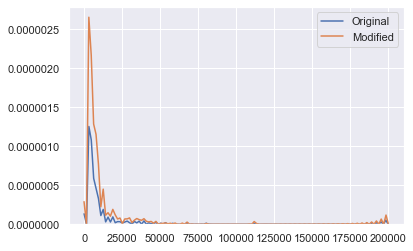

In [204]:
## plot y distribution 
import seaborn
seaborn.kdeplot(train['Clap'], label = "Original")
seaborn.kdeplot(train_smogned1['Clap'], label = "Modified")


In [205]:
train_smogned1['Clap'].describe()

count     65150.000000
mean        358.238680
std        2405.501315
min           0.000000
25%           4.000000
50%         109.000000
75%         211.000000
max      200437.000000
Name: Clap, dtype: float64

It increased the mean of the claps and created more observations with higher claps.

In [208]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
train.head()

,Author,Date,Header,Text,Clap,Elapsed
0,linkventures,2017-11-03,dave blundin big data visionary,link ventures data driven accelerator cogo lab...,47,1017
1,zaiku,2018-06-03,nanosai studio open beta lease 2018 06 01,data intelligence startups devops we pleased a...,0,805
2,corsairspublishing,2017-12-24,gamer guide analytics v1,gamer guide analytics v1 series manifesto hist...,922,966
3,nyucenterfordatascience,2017-11-02,tracking hackersnatural language processingmac...,automated approach analyzing activity undergro...,105,1018
4,yvanscher,2018-02-20,pytorch tip yielding image sizes,need get image sizes using torchvision dataset...,8,908


In [12]:
#converting smogned data to input
train_title_pad2_smogned =train_smogned1.iloc[:,1:11]
train_title_pad2_smogned = np.array(train_title_pad2_smogned)
print(train_title_pad2_smogned)
train_title_pad2_smogned.shape

[[   58    86    14 ...     0     0     0]
 [   55    82    15 ...     0     0     0]
 [   12   388     2 ...     0     0     0]
 ...
 [  519  1347  2103 ...     6     0     0]
 [ 2149 11700  2884 ...     0     0     0]
 [  185  1868   190 ...     0     0     0]]


(65150, 10)

In [13]:
train_author_pad_smogned=train_smogned1.iloc[:,11]
train_author_pad_smogned=np.array(train_author_pad_smogned)
print(train_author_pad_smogned)
train_author_pad_smogned.shape

[ 200  218 6800 ... 1914 2058 6495]


(65150,)

In [14]:
train_author_pad_smogned.reshape(65150,1)
train_author_pad_smogned.shape


(65150,)

In [15]:
#because of smogn there are some tokens created less than 0 or greater than the vocabsize, those values will be treated as oov tokens
train_title_pad2_smogned[train_title_pad2_smogned<0]=1

In [16]:
train_author_pad_smogned[train_author_pad_smogned<0]=1

In [17]:
train_title_pad2_smogned[train_title_pad2_smogned>20000]=1

In [249]:
model_title8 = Sequential()
model_title8.add(embedding_layer_title)
model_title8.add(LSTM(100, dropout=0.25, recurrent_dropout=0.1))
model_title8.add(Dense(1, activation='relu'))
model_title8.compile(loss='mse', optimizer=keras.optimizers.Adam(lr=0.01), metrics=['mse'])
model_title8.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 10, 100)           2000000   
_________________________________________________________________
lstm_12 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 101       
Total params: 2,080,501
Trainable params: 80,501
Non-trainable params: 2,000,000
_________________________________________________________________


In [250]:
model_title8_story=model_title8.fit(train_title_pad2_smogned, train_smogned1['Clap'], validation_data=(test_title_pad2,test['Clap']), epochs = 20, batch_size=1024)

Train on 65150 samples, validate on 16595 samples
Epoch 1/20
65150/65150 [==============================] - 18s 273us/sample - loss: 5889308.8996 - mse: 5889309.0000 - val_loss: 6786587.3823 - val_mse: 6786587.5000
Epoch 2/20
65150/65150 [==============================] - 17s 254us/sample - loss: 5855248.7200 - mse: 5855249.0000 - val_loss: 6776618.2211 - val_mse: 6776619.5000
Epoch 3/20
65150/65150 [==============================] - 17s 255us/sample - loss: 5831560.7660 - mse: 5831561.0000 - val_loss: 6772570.0026 - val_mse: 6772569.5000
Epoch 4/20
65150/65150 [==============================] - 17s 257us/sample - loss: 5814035.9714 - mse: 5814037.0000 - val_loss: 6772889.6277 - val_mse: 6772890.5000
Epoch 5/20
65150/65150 [==============================] - 17s 255us/sample - loss: 5802472.8259 - mse: 5802474.0000 - val_loss: 6775849.6455 - val_mse: 6775849.5000
Epoch 6/20
65150/65150 [==============================] - 17s 255us/sample - loss: 5795220.0901 - mse: 5795219.5000 - val_los

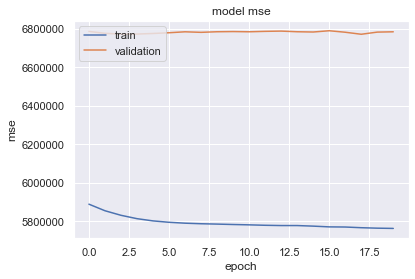

In [265]:
plt.plot(model_title8_story.history['mse'])
plt.plot(model_title8_story.history['val_loss'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [255]:
score_gl_test_title8 = model_title8.evaluate(test_title_pad2, test['Clap'], verbose=0)
score_gl_train_title8 = model_title8.evaluate(train_title_pad2, train['Clap'], verbose=0)
print('Train loss (mse):', score_gl_train_title8[0])
print('Train MSE:', score_gl_train_title8[1])
print('Test loss (mse):', score_gl_test_title8[0])
print('Test MSE:', score_gl_test_title8[1])

Train loss (mse): 2533516.128343753
Train MSE: 2533514.0
Test loss (mse): 6784604.378779376
Test MSE: 6784603.0


In [92]:
table = [['CNN','header', '-', 1024, 'relu', '0.5,0.2', 2516897.25, 6776897.5 ],
       ['CNN','header', '-', 512, 'relu', '0.25,0.2', 2515870.75, 6775370.0],
       ['CNN','header', '-', 256, 'linear', '0.25,0.2',2510962.98, 6770728.0 ],
       ['CNN','header', '-', 1024, 'linear', '0.5,0.2', 2514730.5, 6772782.0 ],
       ['CNN','header', 'SMOGN', 256, 'linear', '0.5,0.2',  2510963.2, 6770728.0 ],
       ['CNN','header', 'SMOGN', 1024, 'relu', '0.25,0.1', 2533514.0, 6764603.0 ],
       ['CNN','header', 'SMOGN', 2048, 'relu', '0.4,0.2',2533405.5, 6785401.0]]

table = pd.DataFrame(table, columns = ['Model_Name', 'Input','Imbalanced Learning', 'Batch Size', 'Activation', 'Dropout', 'Train MSE', 'Test MSE'])

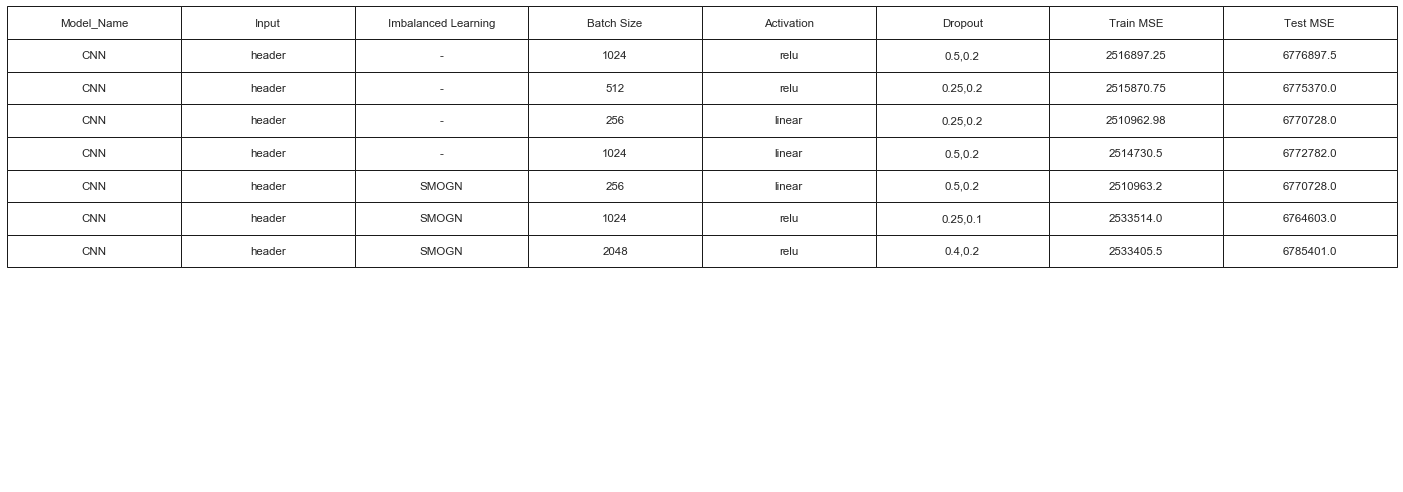

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# hide axes
#fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

table =ax.table(cellText=table.values, colLabels=table.columns, rowLoc='center', cellLoc='center', bbox=[-0.7,1,4.15,1.2])
table.auto_set_font_size(False)
table.set_fontsize(11.5)

plt.show()

### Evaluation of RNN Model

Firstly, text is used as input in LSTM model, however the computation took so long and the results were not promising. Secondly, header is used as an input with imbalanced data. With imbalanced data, great chunk of predictions were very small, they covered small portion of y-space. After introducing SMOGN method, predictions got higher and covered greater space. Although it seems that it doesn’t change MSE metric significantly, it performed a better learning pattern. The most challenging part about the model was applying SMOGN method, it is computationally very costly due to huge matrix of rows. 
Activation functions also had an effect on the performance of the models. Although linear activation function gives faster results, relu seemed more robust and performed better learning behavior due to its nature. Also it prevents to produce negative results.


## BERT Multi-Input Model

Google’ s BERT released in 2018, was an exciting step for NLP world. It has caused a stir in the Machine Learning community by presenting state-of-the-art results in a wide variety of NLP tasks, including Question Answering , Natural Language Inference and others. BERT’s key technical innovation is applying the bidirectional training of Transformer, a popular attention model, to language modelling. This is in contrast to previous efforts which looked at a text sequence either from left to right or combined left-to-right and right-to-left training.[14] 
BERT is a multi-layer bidirectional Transformer encoder. There are two models introduced in the paper.[15]
In this work pre-trained BERT-uncased with 12 attention heads will be used. My BERT model will contain 4 main inputs:

1.The Token IDs: BERT has its own tokenizer, which also tokenize subwords,too. The token IDs will be directly used in the model .However the input for BERT tokenizer should contain two special tokens [SEP] to mark the end of sentences and [CLS] which is needed in the beginning of input. I will add this tokens to my input to shape it into BERT’s expected format. The input should be in a raw form since BERT tokenizer handles the input in a special way. My input for BERT tokenizer will be header since the maximum number of tokens in a pad is 512 and this too short for my text data.
2.Mask IDs: This indicates which elemnts are in sequence are the tokens and which ones are the padding elements.

3.Segment IDs: Segment IDs are used to distinguish different sentences. Since I use only header for a string input, I will only have 1 sentence per observation.

4.Elapsed: It is my personal input. Elapsed is the number of days passed since particular post is written.	



In [24]:
#creating a copy and splitting the train and test set
bert=known.copy()
bert_train ,bert_test = train_test_split(bert, test_size=0.25, random_state=35)
bert_train.reset_index(drop=True, inplace=True)
bert_test.reset_index(drop=True, inplace=True)

In [62]:
#there is a need for another cleaning header function since BERT needs to perform under raw header,.
a="I am doing computers coding machine learning consultant x b. I am das "
#cleaning header
def clean_header_bert(text):
    ##Removing the  URLs

    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r"\ re", " are ", text)
    text = re.sub(r" don t ", " do not ", text)
    text = re.sub(r"\ ve", " have ", text)
    text = re.sub(r"\ ll", " will ", text)
    text = re.sub(r"(W|w)on(\'|\’)t ", "will not ", text)
    text = re.sub(r"(C|c)an(\'|\’)t ", "can not ", text)
    text = re.sub(r"(Y|y)(\'|\’)all ", "you all ", text)
    text = re.sub(r"(Y|y)a(\'|\’)ll ", "you all ", text)
    text=re.sub('[^\w\s]', '',text)
    text=re.sub(r"\n","", text)
 
 

    
   
    
    return text


b=clean_header_bert(a)
b


'I am doing computers coding machine learning consultant x b I am das '

In [63]:
bert_train['Header']=bert_train['Header'].astype(str)
bert_train['Header']=bert_train.apply(lambda  x: clean_header_bert(x['Header']) ,axis=1)
bert_train['Header'].head()

C:\Users\gta\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\gta\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0                   Dave Blundin Big Data Visionary
1        Nanosai Studio  Open Beta Release 20180601
2                      Gamers Guide to Analytics v1
3    Tracking Hackers with NLP and Machine Learning
4                  Pytorch Tip Yielding Image Sizes
Name: Header, dtype: object

In [64]:
bert_test['Header']=bert_test['Header'].astype(str)
bert_test['Header']=bert_test.apply(lambda  x: clean_header_bert(x['Header']) ,axis=1)
bert_test['Header'].head()

C:\Users\gta\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\gta\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    Artificial Intelligence the good the bad or th...
1    Self Learning Data Science Housing Price Predi...
2                           Likes Shares and Sentiment
3                        10 new things to are ad in AI
4    Top 5 Misconceptions of Data Warehousing Projects
Name: Header, dtype: object

In [65]:
sentences_train = ["[CLS] " + sent + " [SEP]" for sent in  bert_train['Header'].astype(str)]
sentences_test = ["[CLS] " + sent + " [SEP]" for sent in  bert_test['Header'].astype(str)]

sentences_train[0], sentences_test[0]

('[CLS] Dave Blundin Big Data Visionary [SEP]',
 '[CLS] Artificial Intelligence the good the bad or the useful [SEP]')

In [342]:
pip install torch==1.6.0+cpu torchvision==0.7.0+cpu -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
Note: you may need to restart the kernel to use updated packages.


In [26]:

import random
import re
import string 
#!pip install tensorflow
import tensorflow as tf
#!pip install tensorflow-hub
#!pip install pytorch-pretrained-bert

import tensorflow_hub as hub


from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Precision, Recall, FalseNegatives, FalsePositives
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.utils import to_categorical
from pytorch_pretrained_bert import BertTokenizer
from tensorflow.keras.models import Model 


In [66]:
# using bert tokenizer
tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
tokenized_texts_train = [tokenizer_bert.tokenize(sent) for sent in sentences_train]
tokenized_texts_test = [tokenizer_bert.tokenize(sent) for sent in sentences_test]

tokenized_texts_train[0], tokenized_texts_test[0]

(['[CLS]', 'dave', 'blu', '##ndi', '##n', 'big', 'data', 'visionary', '[SEP]'],
 ['[CLS]',
  'artificial',
  'intelligence',
  'the',
  'good',
  'the',
  'bad',
  'or',
  'the',
  'useful',
  '[SEP]'])

In [67]:
# the functions are taken from this helpful post:https://towardsdatascience.com/simple-bert-using-tensorflow-2-0-132cb19e9b22
def get_ids(tokens, tokenizer, max_seq_length):
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    input_ids = token_ids + [0] * (max_seq_length-len(token_ids))
    return input_ids

def get_masks(tokens, max_seq_length):
    if len(tokens) > max_seq_length:
        raise IndexError("Token length more than max seq length!")
    return [1]*len(tokens) + [0] * (max_seq_length - len(tokens))

def get_segments(tokens, max_seq_length):
    if len(tokens)>max_seq_length:
        raise IndexError("Token length more than max seq length!")
    segments = []
    current_segment_id = 0
    for token in tokens:
        segments.append(current_segment_id)
        if token == "[SEP]":
            current_segment_id = 1
    return segments + [0] * (max_seq_length - len(tokens))

In [68]:
#for padding we need to find the longest sequence
def find_max_seq(list):
    x = [len(i) for i in list]
    return max(x)
    
longest_train = find_max_seq(tokenized_texts_train)
longest_test = find_max_seq(tokenized_texts_test)
print(longest_train, longest_test)

59 60


In [69]:
max_sequence_length=60

In [352]:
bert_train.head()

,Author,Date,Header,Text,Clap,Elapsed
0,Link Ventures,2017-11-03,Dave Blundin: Big Data Visionary,Link Ventures and its datadriven accelerator C...,47,1017
1,Zaiku,2018-06-03,Nanosai Studio — Open Beta Release (2018–06–01),Data Intelligence for Startups and DevOpsWe ar...,0,805
2,Corsair's Publishing,2017-12-24,Gamer’s Guide to Analytics v1,Gamers Guide to Analytics v1A Series A Manifes...,922,966
3,NYU Center for Data Science,2017-11-02,Tracking Hackers with NLP and Machine Learning,An automated approach for analyzing activity o...,105,1018
4,Yvan Scher,2018-02-20,Pytorch Tip: Yielding Image Sizes,Need to get image sizes using torchvision data...,8,908


In [70]:
with open('tokenized_texts_train','wb') as f:
    pickle.dump(tokenized_texts_train,f)

In [71]:
with open('tokenized_texts_test','wb') as f:
    pickle.dump(tokenized_texts_test,f)

In [72]:
# constructing the inputs for training and test data
mask_ids_train = [] 
for i in range(len(tokenized_texts_train)):
    mask_ids_train.append(get_masks(tokenized_texts_train[i], max_sequence_length))
    
input_ids_train = []
for i in range(len(tokenized_texts_train)):
    input_ids_train.append(get_ids(tokenized_texts_train[i], tokenizer_bert, max_sequence_length))        


segments_ids_train = [] 
for i in range(len(tokenized_texts_train)):
    segments_ids_train.append(get_segments(tokenized_texts_train[i], max_sequence_length))
   
    
elapsed_train = []
for i in range(len(tokenized_texts_train)):    
    elapsed_train.append(bert_train['Elapsed'].iloc[i])    

#test
mask_ids_test = [] 
for i in range(len(tokenized_texts_test)):
    mask_ids_test.append(get_masks(tokenized_texts_test[i], max_sequence_length))
    
input_ids_test = []
for i in range(len(tokenized_texts_test)):
    input_ids_test.append(get_ids(tokenized_texts_test[i], tokenizer_bert, max_sequence_length))        


segments_ids_test = [] 
for i in range(len(tokenized_texts_test)):
    segments_ids_test.append(get_segments(tokenized_texts_test[i], max_sequence_length))
   
    
elapsed_test = []
for i in range(len(tokenized_texts_test)):    
    elapsed_test.append(bert_test['Elapsed'].iloc[i])  
    


In [73]:
# covnerting lists to tensors for training set
input_ids_train = tf.convert_to_tensor(input_ids_train, dtype = tf.int32)
mask_ids_train = tf.convert_to_tensor(mask_ids_train, dtype = tf.int32)
segments_ids_train = tf.convert_to_tensor(segments_ids_train, dtype = tf.int32)
elapsed_train = tf.convert_to_tensor(elapsed_train, dtype = tf.int32)

#test set convertion
input_ids_test = tf.convert_to_tensor(input_ids_test, dtype = tf.int32)
mask_ids_test = tf.convert_to_tensor(mask_ids_test, dtype = tf.int32)
segments_ids_test = tf.convert_to_tensor(segments_ids_test, dtype = tf.int32)
elapsed_test = tf.convert_to_tensor(elapsed_test, dtype = tf.int32)


In [76]:
random.seed(55)
# defining my 4 inputs as inputs to the model
input_id_layer = Input(shape = (max_sequence_length,), dtype = tf.int32, name = "InputIDs")
mask_id_layer = Input(shape = (max_sequence_length,), dtype = tf.int32, name = "MaskIDs")
segment_id_layer = Input(shape = (max_sequence_length,), dtype = tf.int32, name = "SegmentIDs")
elapsed_layer = Input(shape=(1))

# Importing the pre-trained uncased Bert model with 12 attention heads
bertLayer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1", trainable=True)


pooled_output, sequence_output = bertLayer([input_id_layer, mask_id_layer, segment_id_layer])
first_output = concatenate([pooled_output,elapsed_layer])
first_output = Dropout(0.1)(first_output)
output = Dense(units = 500, activation = "tanh")(first_output)
output = Dropout(0.1)(output)
output = Dense(units = 1, activation = "relu")(output)

bert_model = Model(inputs=[input_id_layer, mask_id_layer, segment_id_layer,elapsed_layer], outputs = output)

# Model Compilation
learning_rate = 3e-5
number_of_epochs = 3
optimizer = Adam(learning_rate = learning_rate)
loss = tf.keras.losses.MeanSquaredError()
metrics =  tf.keras.metrics.MeanSquaredError()
          
         
bert_model.compile(optimizer = optimizer, 
              loss = loss,
              metrics=metrics)


In [80]:

first_output = Dropout(0.1)(first_output)
output = Dense(units = 500, activation = "tanh")(first_output)
output = Dropout(0.1)(output)
output = Dense(units = 1, activation = "relu")(output)

bert_model = Model(inputs=[input_id_layer, mask_id_layer, segment_id_layer,elapsed_layer], outputs = output)

# Model Compilation
learning_rate = 3e-5
number_of_epochs = 3
optimizer = Adam(learning_rate = learning_rate)
loss = tf.keras.losses.MeanSquaredError()
metrics =  tf.keras.metrics.MeanSquaredError()
          
         
bert_model.compile(optimizer = optimizer, 
              loss = loss,
              metrics=metrics)

In [81]:
# Model Training & Fine-Tuning on train data
#earlyStopping = EarlyStopping(monitor = "val_loss", mode = "min", patience = 4)

model_title_bert2_story = bert_model.fit([input_ids_train, mask_ids_train, segments_ids_train,elapsed_train], [bert_train['Clap']],
                         epochs = number_of_epochs, 
                         batch_size = 32,
                         #callbacks = [earlyStopping],
                                   validation_data=([input_ids_test, mask_ids_test, segments_ids_test,elapsed_test], [bert_test['Clap']])
                         )


Epoch 1/3
1556/1556 [==============================] - 12317s 8s/step - loss: 2537875.5000 - mean_squared_error: 2537875.5000 - val_loss: 6802627.0000 - val_mean_squared_error: 6802627.0000
Epoch 2/3
1556/1556 [==============================] - 12321s 8s/step - loss: 2535502.5000 - mean_squared_error: 2535502.5000 - val_loss: 6799830.5000 - val_mean_squared_error: 6799830.5000
Epoch 3/3
1556/1556 [==============================] - 13385s 9s/step - loss: 2533329.2500 - mean_squared_error: 2533329.2500 - val_loss: 6797180.5000 - val_mean_squared_error: 6797180.5000


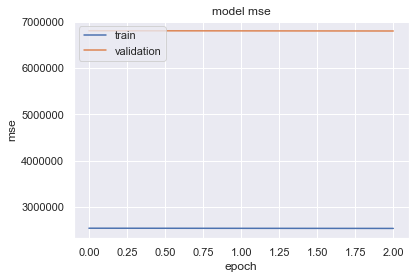

In [83]:
plt.plot(model_title_bert2_story.history['mean_squared_error'])
plt.plot(model_title_bert2_story.history['val_loss'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [90]:
table2 = [['BERT',4, '5e-5', 32, 'tanh,relu', '0.25,0.1', 2530260.5000, 6792029.5000],
       ['BERT',3, '3e-5', 32, 'tanh,relu', '0.1,0.1', 2533329.2500 , 6797180.5000],
       ['BERT',3, '2e-5', 64, 'tanh,linear', '0.25,0.25',2532479.5000, 6770728.0 ]]


table2 = pd.DataFrame(table2, columns = ['Model_Name', 'Epochs','Learning rate', 'Batch Size', 'Activation', 'Dropout', 'Train MSE', 'Test MSE'])

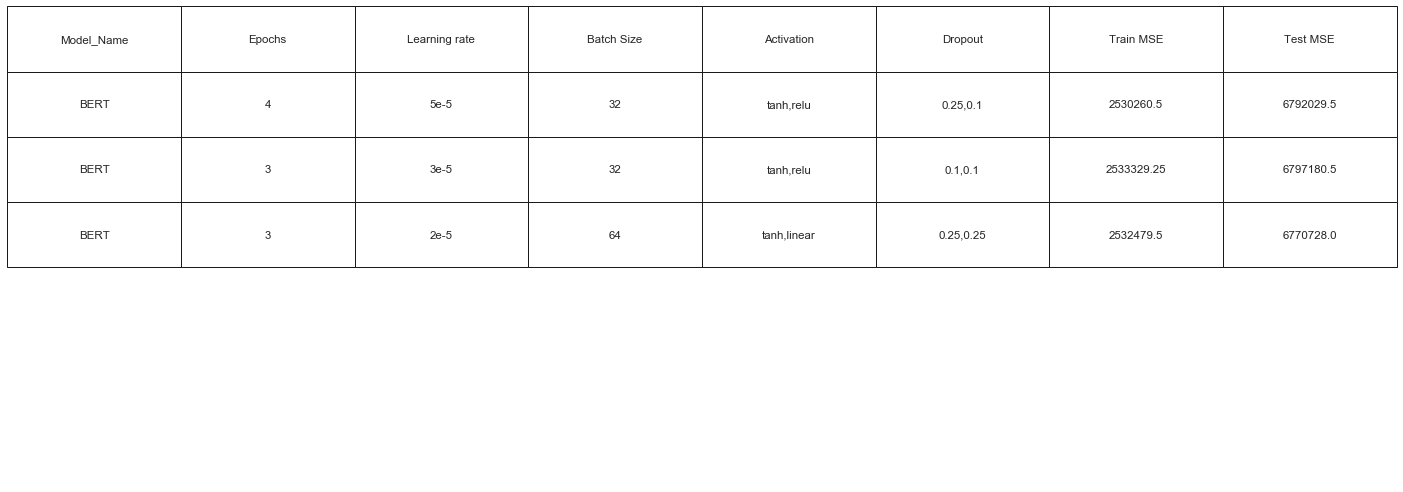

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# hide axes
#fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

table2 =ax.table(cellText=table2.values, colLabels=table2.columns, rowLoc='center', cellLoc='center', bbox=[-0.7,1,4.15,1.2])
table2.auto_set_font_size(False)
table2.set_fontsize(11.5)

plt.show()

### Evaluation of Results

I trained only 3 different BERT- multi input models due to its computational cost. I used small number of epochs and very small learning rate since not to change pre-trained transfer knowledge dramatically as it is recommended in most of the machine learning forums. However, the metric results and learning behavior is not improved as it is expected. Although BERT model is a path-breaking and sophisticated approach, the regression tasks are not perfect fit for the model. Its huge success is mostly in tasks like Natural Language Inference or Question Answering. Adapting BERT into a regression task is very challenged and sensitive task. In this work, this adaptation is failed. There are some ideas like freezing all the heads except for regression head and training BERT accordingly. Those ideas can be discussed in further studies. Although BERT has its own tokenizer and embeddings, it failed to outperform basic LSTM model with GloVe weights.

My final model is:

Type:LSTM
Input:Header
Activation function:relu
Learning reate:0.01
Batch size:1024
Drop out:0.25
Recurrent dropout:0.1
Epochs:20



# Benchmark


## LASSO Regression

LASSO Regression is applied for the benchmark in this work. LASSO regularization allows regression not to overfit by penalizing the coefficients. Due to its nature, it is a natural feature choosing mechanism that allows only important features in the model. Since the all the words in the input might not be relevant, LASSO regression is chosen. Elapsed and Header are chosen as input for convenience. No imbalance learning method is applied to the benchmark.

In [209]:

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(train['Header'])

X_train_countvec = vectorizer.transform(train['Header'])  
enc = DictVectorizer()
X_train_category = enc.fit_transform(train[['Elapsed']].to_dict('records'))
X_train = hstack([X_train_countvec,X_train_category])


In [210]:
X_test_countvec  = vectorizer.transform(test['Header'])
X_test_category = enc.transform(test[['Elapsed']].to_dict('records'))
X_test = hstack([X_test_countvec, X_test_category])

In [211]:
y_train=train['Clap']
y_test=test['Clap']

In [212]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=8)
reg.fit(X_train, y_train)

Lasso(alpha=8)

In [213]:
reslut_train = reg.predict(X_train)
print(mean_squared_error(y_train, reslut_train))  

2507219.14308668


In [214]:
result_test = reg.predict(X_test)
print(mean_squared_error(y_test, result_test))  

6769629.389255782


In [94]:
table3 = [['RNN','header', 'SMOGN', 2533514.0, 6764603.0 ],
       ['LASSO Regression','author,elapsed', '-',2507219.1, 6769629.389255782 ]] #the best result

table3 = pd.DataFrame(table3, columns = ['Model Name', 'Input','Imbalanced Learning', 'Train MSE', 'Test MSE',])

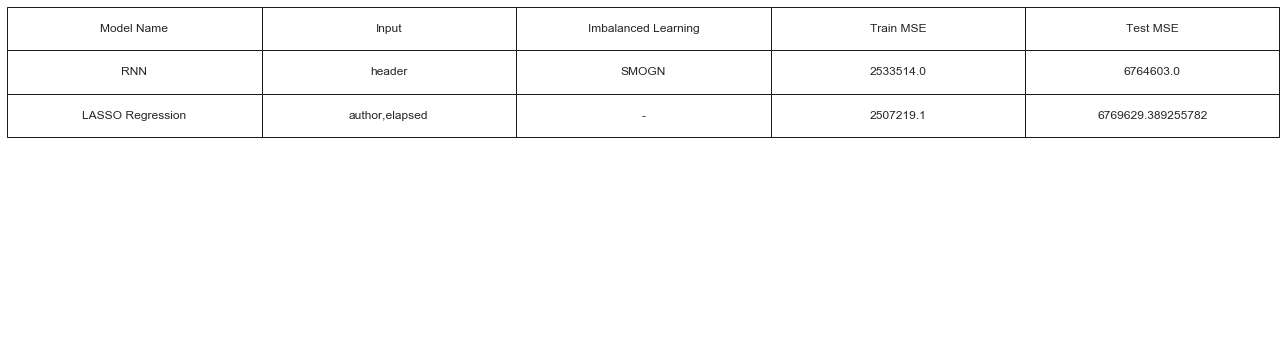

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# hide axes
#fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

table3 =ax.table(cellText=table3.values, colLabels=table3.columns, rowLoc='center', cellLoc='center', bbox=[-0.7,1,3.8,0.6])
table3.auto_set_font_size(False)
table3.set_fontsize(12)

plt.show()

Although the benchmark performs better in training set, the validation error of the chosen model is less than the benchmark. That might be due to overfitting behvaior of the benchmark.

# Predictions

Some cleaning already applied to unknown data. Some further cleaning and processes will be applied to unknown data in order to get it into the same format with training data set to plug in the chosen model

In [98]:
with open('unknown_cleaned', 'rb') as f:
    unknown_cleaned = pickle.load(f)

In [99]:
  unknown_cleaned.head()

,Author,PublicationDetails,Header,Text,Elapsed
0,danieljeffries,"Daniel Jeffries in HackerNoon.comJul 31, 2017",everyone missed mind blowing feature cryptocur...,there one incredible feature cryptocurrencies ...,1112
1,noamlevenson,"Noam Levenson in HackerNoon.comDec 6, 2017",neo rsus ethereum neo might 2018 strongest cry...,image class progressivemedia noscript js progr...,984
2,danieljeffries,"Daniel Jeffries in HackerNoon.comJul 21, 2017",cryptocurrency trading bible,want trade cryptocurrency you ve seen eye popp...,1122
3,haseebqureshi,"Haseeb Qureshi in HackerNoon.comFeb 19, 2018",stablecoins designing price stable cryptocurrency,useful currency medium exchange unit account s...,909
4,williambelk,"William Belk in HackerNoon.comJan 28, 2018",chaos vs order cryptocurrency dilemma,crypto crypto crypto crypto information techno...,931


In [103]:
#applying cleaning 2 to unknown
unknown_cleaned['Header']= unknown_cleaned['Header'].astype(str)
unknown_cleaned['Header']= unknown_cleaned.apply(lambda  x: clean2_text(x['Header']) ,axis=1)
unknown_cleaned['Header'].head()



0    everyone missed mind blowing feature cryptocur...
1    neo rsus ethereum neo might 2018 strongest cry...
2                         cryptocurrency trading bible
3    stablecoins designing price stable cryptocurrency
4                chaos vs order cryptocurrency dilemma
Name: Header, dtype: object

In [106]:
vocabsize2=20000
#tokenizer_obj_title=Tokenizer(num_words=vocabsize2,oov_token=1)
#tokenizer_obj_title.fit_on_texts(train['Header'])
MAX_LEN2=10
sequences_title_unknown_cleaned=tokenizer_obj_title.texts_to_sequences(unknown_cleaned['Header'])
unknown_cleaned_title_pad=pad_sequences(sequences_title_unknown_cleaned,maxlen=MAX_LEN2,truncating='post',padding='post')

In [107]:
with open('glove_weights2','rb') as file_name:
    glove_weights2=pickle.load(file_name)

In [110]:
model_title8 = Sequential()
model_title8.add(embedding_layer_title)
model_title8.add(LSTM(100, dropout=0.25, recurrent_dropout=0.1))
model_title8.add(Dense(1, activation='relu'))
model_title8.compile(loss='mse', optimizer=keras.optimizers.Adam(lr=0.01), metrics=['mse'])
model_title8.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           2000000   
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 2,080,501
Trainable params: 80,501
Non-trainable params: 2,000,000
_________________________________________________________________


In [112]:
model_title8_story=model_title8.fit(train_title_pad2_smogned, train_smogned1['Clap'], validation_data=(test_title_pad2,test['Clap']), epochs = 20, batch_size=1024)

Epoch 1/20
64/64 [==============================] - 8s 126ms/step - loss: 5887119.0000 - mse: 5887119.0000 - val_loss: 6785537.5000 - val_mse: 6785537.5000
Epoch 2/20
64/64 [==============================] - 7s 106ms/step - loss: 5852342.5000 - mse: 5852342.5000 - val_loss: 6775823.5000 - val_mse: 6775823.5000
Epoch 3/20
64/64 [==============================] - 7s 106ms/step - loss: 5828338.5000 - mse: 5828338.5000 - val_loss: 6772344.5000 - val_mse: 6772344.5000
Epoch 4/20
64/64 [==============================] - 7s 106ms/step - loss: 5811448.5000 - mse: 5811448.5000 - val_loss: 6773168.5000 - val_mse: 6773168.5000
Epoch 5/20
64/64 [==============================] - 7s 106ms/step - loss: 5800694.0000 - mse: 5800694.0000 - val_loss: 6776431.0000 - val_mse: 6776431.0000
Epoch 6/20
64/64 [==============================] - 7s 103ms/step - loss: 5794589.5000 - mse: 5794589.5000 - val_loss: 6780168.0000 - val_mse: 6780168.0000
Epoch 7/20
64/64 [==============================] - 7s 102ms/ste

In [121]:
prediction = model_title8.predict(unknown_cleaned_title_pad)
frame = pd.DataFrame(data=prediction.flatten(),columns=['Claps'])

print(frame)
#write predictions
frame.head()

          Claps
0    392.664001
1    218.446304
2    297.385986
3    362.090332
4    325.048767
..          ...
509  391.448303
510  386.513000
511  390.604187
512  374.172363
513  372.820068

[514 rows x 1 columns]


,Claps
0,392.664001
1,218.446304
2,297.385986
3,362.090332
4,325.048767


In [122]:
index=list(range(0, 514))
index = pd.DataFrame(data=index, columns=['index'])
myresults=pd.concat([index,frame],axis=1)
myresults

,index,Claps
0,0,392.664001
1,1,218.446304
2,2,297.385986
3,3,362.090332
4,4,325.048767
...,...,...
509,509,391.448303
510,510,386.513000
511,511,390.604187
512,512,374.172363


In [124]:
myresults.to_csv('final_submission.csv',index=False)

# Conclusion and Further Study

As it is mentioned before, NLP is defined as a subfield of Artificial Intelligence which is designed to understand, read or replicate human languages with machines. It is a challenging task due to complicated mechanisms of languages which still have a lot to discover. In this work, the task is to predict the number of claps of each post in Medium.com. That is a challenging task due to continuous output, rawness of the inputs and it has a specific corpus. I used two different approaches to solve the task, which are RNN and BERT. Although BERT is more sophisticated and very successful approach, the application of it in this task was poor. Hence, the chosen model is RNN. It succeeded to beat the benchmark which is LASSO regression. Header was the main input in this study due to computational ease.
There is a lot room for the improvement to this study such as using texts as inputs. That can be possible with a greater computational power than my personal computer. Greater pertained- models or embeddings can be used in that case, too. A corpus specific pre-trained embedding would the increase overall performance dramatically, since the corpus in the task was mostly focused in tech world. More sophisticated and more carefully adapted BERT model can bring a big improvement since it is quite successful on language models.


# References

[1]Harnad, Stevan (2008), "The Annotation Game: On Turing (1950) on Computing, Machinery, and Intelligence", in Epstein, Robert; Peters, Grace (eds.), The Turing Test Sourcebook: Philosophical and Methodological Issues in the Quest for the Thinking Computer, Kluwer
[2]Winograd, Terry (1971-01-01). "Procedures as a Representation for Data in a Computer Program for Understanding Natural Language"
[3] Weizenbaum, Joseph (1976). Computer Power and Human Reason: From Judgment to Calculation. New York: W. H. Freeman and Company. pp. 2, 3, 6, 182, 189. ISBN 0-7167-0464-1.
[4] Canuma, P. (2019, September 16). The brief history of NLP. Retrieved August 12, 2020, from https://medium.com/datadriveninvestor/the-brief-history-of-nlp-c90f331b6ad7
 
[5] Jurafsky, D. (2000). Speech & language processing. Pearson Education India.
[6] Pennington, J., Socher, R., & Manning, C. (2014). Glove: Global Vectors for Word Representation. Proceedings of the 2014 Conference on Empirical Methods in Natural Language Processing (EMNLP). doi:10.3115/v1/d14-1162
[7] DeepAI. (2019, May 17). Neural Network. Retrieved August 25, 2020, from https://deepai.org/machine-learning-glossary-and-terms/neural-network

[8] Recurrent Neural Networks cheatsheet Star. (n.d.). Retrieved August 17, 2020, from https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks
 [9] Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N Gomez, Lukasz Kaiser, and Illia Polosukhin. 2017. Attention is all you need. In Advances in Neural Information Processing Systems,
[10] Jacob Devlin, Ming-Wei Chang, Kenton Lee, Kristina Toutanova. 2019. BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding
[11] Hochreiter, S., & Schmidhuber, J. (1995). Long short term memory. München: Inst. für Informatik.
[12] Chawla, N. V., Bowyer, K. W., Hall, L. O., & Kegelmeyer, W. P. (2002). SMOTE: Synthetic Minority Over-sampling Technique. Journal of Artificial Intelligence Research, 16, 321-357. doi:10.1613/jair.953
[13] Paula Branco, Lu’ıs Torgo, Rita P. Ribeiro. 2017. SMOGN: a Pre-processing Approach for Imbalanced Regression
[14] Horev, R. (2018, November 17). BERT Explained: State of the art language model for NLP. Retrieved August 20, 2020, from https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270

[15] Seth, Y. (2020, June 14). BERT Explained – A list of Frequently Asked Questions. Retrieved August 15, 2020, from https://yashuseth.blog/2019/06/12/bert-explained-faqs-understand-bert-working/


# Appendix

## Results with Text Input

In [125]:
table4 = [['CNN','Text', '-', 1024, 'relu', '0.5,0.2',2521798.0, 6783348.5 ],
       ['CNN','Text', '-', 512, 'relu', '0.4,0.2', 2529309.75, 6792419.5]]

table4 = pd.DataFrame(table4, columns = ['Model_Name', 'Input','Imbalanced Learning', 'Batch Size', 'Activation', 'Dropout', 'Train MSE', 'Test MSE'])

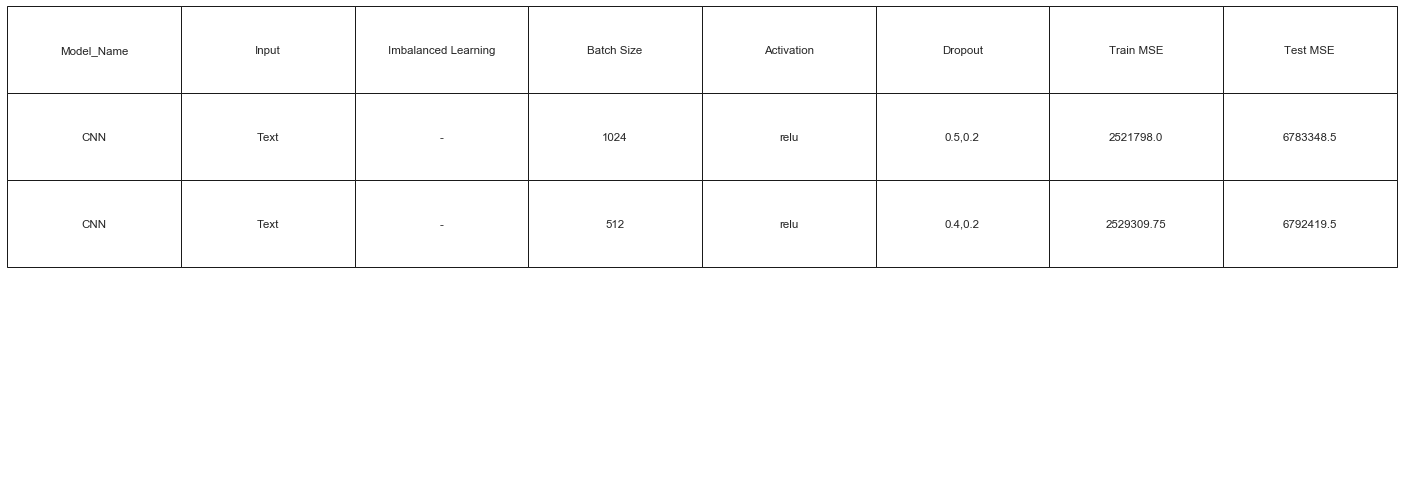

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# hide axes
#fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

table4 =ax.table(cellText=table4.values, colLabels=table4.columns, rowLoc='center', cellLoc='center', bbox=[-0.7,1,4.15,1.2])
table4.auto_set_font_size(False)
table4.set_fontsize(11.5)

plt.show()